In [ ]:
!pip install fuzzywuzzy[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.3 MB/s eta 0:00:00


In [ ]:
# Importar las librerias necesarias

import pandas as pd
import numpy as npee
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np
import spacy as scy
from google.colab import files
from collections import Counter
from wordcloud import WordCloud

In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Respuestas_la_felicidad_de_los_tulueños - Encuesta_LA_FELICIDAD_DE_LOS_TU.csv to Respuestas_la_felicidad_de_los_tulueños - Encuesta_LA_FELICIDAD_DE_LOS_TU.csv


In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Sep-01-2024_Oct-30-2024_419526534529200.csv to Sep-01-2024_Oct-30-2024_419526534529200.csv


In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Sep-01-2024_Oct-30-2024_2253554688360076.csv to Sep-01-2024_Oct-30-2024_2253554688360076.csv


In [ ]:
data_municipalidad_facebook = pd.read_csv('Sep-01-2024_Oct-30-2024_2253554688360076.csv')

In [ ]:
data_municipalidad_instagram = pd.read_csv('Sep-01-2024_Oct-30-2024_419526534529200.csv')

In [ ]:
data_municipalidad_felicidad_tulueños = pd.read_csv('Respuestas_la_felicidad_de_los_tulueños - Encuesta_LA_FELICIDAD_DE_LOS_TU.csv')

In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Lista de barrios específicos a preservar
barrios_especificos = [
    "Ciudad Campestre", "El Retiro", "Fátima", "Urbanización Lomitas", "El Jazmín", "Miraflores",
    "Panamericano", "La Rivera", "San Benito", "Victoria", "Villa Campestre", "Villa del Río",
    "Alvernia", "Céspedes", "Entre Ríos", "Franciscanos", "Nuevo Alvernia", "San Vicente de Paúl",
    "Urbanización Santa Lucía", "Asoagrin", "La Santa Cruz", "Casa Huertas", "El Bosque", "El Cóndor I y II",
    "El Dorado", "Estambul", "La Inmaculada", "La Villa", "Las Brisas", "Morales", "Nuevo Morales",
    "Moralito", "Popular", "San Antonio", "Santa Rita del Río", "Urbanización Peñaranda", "Villanueva",
    "Asociación de Vivienda Los Pinos", "Nuevo Morales", "El Centro", "Escobar", "Las Olas", "Palobonito",
    "Tomás Uribe Uribe", "Avenida Cali", "Conjunto Residencial Lusitania", "Doce de Octubre", "El Lago",
    "El Laguito", "El Príncipe", "Nuevo Príncipe", "Principito", "La Bastilla", "La Merced", "Las Acacias",
    "Lusitania", "Sajonia", "Salesiano", "San Carlos", "Quintas de San Felipe", "Bolívar", "Playas",
    "Marandúa", "Pueblo Nuevo", "Asoagrin - Farfán", "La Ceiba", "La Esperanza", "Comuneros",
    "Corazón del Valle", "Buenos Aires", "Primero de Mayo", "Las Delicias", "350 Años", "El Pinar",
    "Progresar", "San Pedro Claver", "La Herradura", "Ciudad Las Palmas", "Departamental", "El Porvenir",
    "Farfán", "La Quinta", "Las Américas", "Los Tolúes", "Rojas", "Diablos Rojos", "El Descanso",
    "El Limonar", "Guayacanes", "José Antonio Galán", "Juan de Lemus y Aguirre", "La Campiña",
    "Las Nieves", "Las Veraneras", "San Marino", "Laureles I y II", "Nuevo Farfán", "Los Olmos",
    "Prados del Norte", "Rubén Cruz Vélez", "Villa del Lago", "Villa Liliana", "Villa del Sur",
    "Chiminangos", "Municipal", "Bello Horizonte", "Bosques de Maracaibo", "Comfamiliar",
    "Americana de Vivienda (Diablos Rojos II)", "El Refugio", "Flor de la Campana", "Horizonte",
    "Santa Isabel", "Jorge Eliecer Gaitán", "La Independencia", "El Limonar", "Río Paila", "San Luis",
    "Santa Inés de Comfamiliar", "Sintra SanCarlos", "Tercer Milenio", "Alameda I y II", "El Jardín",
    "El Palmar", "La Graciela", "La Trinidad", "Siete de Agosto", "Villa Colombia", "Internacional",
    "Juan XXIII", "El Bosquecito", "Maracaibo", "Río Paila", "Portales del Río", "Samán del Norte",
    "Aguaclara", "La Paz", "El Paraíso"
]

# Función para limpiar y comparar nombres de barrios
def obtener_barrio_mejora(texto):
    if pd.isnull(texto):
        return pd.Series([None, None])

    # Eliminar palabras irrelevantes como "barrio"
    texto = texto.lower().replace("barrio", "").strip()

    # Buscar coincidencia aproximada del barrio
    mejor_coincidencia, score = process.extractOne(texto, barrios_especificos, scorer=fuzz.partial_ratio)

    # Si el puntaje de coincidencia es alto, lo consideramos el barrio, el resto es mejora
    if score > 80:  # Ajustable según precisión deseada
        mejora = texto[len(mejor_coincidencia.lower()):].strip(" ,.-")
        return pd.Series([mejor_coincidencia, mejora])

    # Si no se encuentra coincidencia suficiente, devolvemos el texto en mejora
    return pd.Series([None, texto])

# Aplicar la función a la columna original
data_municipalidad_felicidad_tulueños[['Barrio', 'Mejora_barrio']] = data_municipalidad_felicidad_tulueños['¿En que barrio resides y que harías para mejorarlo?'].apply(obtener_barrio_mejora)

# Eliminar filas donde ambas columnas resultantes sean nulas
data_cleaned = data_municipalidad_felicidad_tulueños.dropna(subset=['Barrio', 'Mejora_barrio'], how='all')

# Reiniciar el índice del DataFrame limpio
data_cleaned.reset_index(drop=True, inplace=True)

# Visualizar los primeros resultados para confirmar que todo funciona correctamente
data_cleaned[['Barrio', 'Mejora_barrio']].head()


# Asegurarse de que la columna 'Fecha de nacimiento' esté en formato datetime en el dataset `data_cleaned`
data_cleaned['Fecha de nacimiento'] = pd.to_datetime(data_cleaned['Fecha de nacimiento'], errors='coerce')

# Calcular la edad en función de la fecha actual y agregarla al DataFrame
today = datetime.today()
data_cleaned['Edad'] = data_cleaned['Fecha de nacimiento'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None)

# Mostrar las primeras filas con la nueva columna de Edad para verificar
data_cleaned[['Fecha de nacimiento', 'Edad']].head()



<ipython-input-22-e2f289b1adc8>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Fecha de nacimiento'] = pd.to_datetime(data_cleaned['Fecha de nacimiento'], errors='coerce')
<ipython-input-22-e2f289b1adc8>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Edad'] = data_cleaned['Fecha de nacimiento'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None)


,Fecha de nacimiento,Edad
0,1976-03-08,48
1,1967-06-05,57
2,1991-01-08,33
3,1997-07-30,27
4,1960-11-16,63


In [ ]:
data_cleaned

,Registro,Dispositivo,Fecha de nacimiento,Género,¿Qué tan satisfecho está con su vida actualmente?,¿Hasta qué punto siente que las cosas que hace en su vida diaria valen la pena?,"<b>Pensando en tu bienestar emocional, ¿qué tan feliz o ansioso(a) te sentiste ayer?</b>",<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>,¿Mejorarías algo en tu Barrio?,¿En que barrio resides y que harías para mejorarlo?,Duración,Barrio,Mejora_barrio,Edad
0,2024-10-23 19:00:18,phone,1976-03-08,female,8.0,10.0,Feliz,Más oportunidades para niños y jóvenes,SI,"Albernia, camaras de vigilancia",02:22,Alvernia,camaras de vigilancia,48
1,2024-10-23 17:49:21,teléfono,1967-06-05,male,8.0,8.0,Feliz,La inseguridad,SI,"La herradura, más iluminacion",01:15,La Herradura,más iluminacion,57
2,2024-10-23 18:15:38,teléfono,1991-01-08,male,8.0,10.0,Feliz,Traer inversión extranjera de empresas que gen...,SI,"Saman del norte, mejorar el acceso en las vias...",02:53,Samán del Norte,mejorar el acceso en las vias y un reordenamie...,33
3,2024-10-23 18:56:06,teléfono,1997-07-30,female,6.0,4.0,Muy ansioso,"Muchas cosas, empezando por el orden público, ...",SI,"Bosques de Maracaibo, la junta de acción comun...",01:17,Bosques de Maracaibo,la junta de acción comunal tiene el un poco d...,27
4,2024-10-23 19:11:36,teléfono,1960-11-16,female,6.0,10.0,Feliz,La seguridad y los centros de salud,SI,"Villacampestre, arreglar las calles",01:28,Villa Campestre,arreglar las calles,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2024-10-30 07:34:43,teléfono,1968-03-13,female,5.0,4.0,Neutral,La educación desde la Flia y la manera de busc...,SI,Barrio Rubén Cruz . Mejoraria el Ruido y la ...,07:56,None,rubén cruz . mejoraria el ruido y la contami...,56
106,2024-10-30 08:07:54,teléfono,1987-06-04,female,5.0,7.0,Un poco ansioso,Cambiaría la inseguridad el temor que ya da sa...,SI,"San Antonio,mejoraría la cancha deportiva y co...",03:19,San Antonio,mejoraría la cancha deportiva y como queda cer...,37
107,2024-10-30 10:12:07,teléfono,1965-11-01,male,10.0,10.0,Neutral,Nuestro comportamiento en las vias mas toleramcia,SI,Panamericano,11:00,Panamericano,,59
108,2024-10-30 13:55:43,teléfono,1975-12-10,male,10.0,8.0,Feliz,La inseguridad . No me siento seguro en ning...,SI,En el barrio la santa cruz . Mucho consumo y v...,03:24,La Santa Cruz,ta cruz . mucho consumo y venta de estupefacie...,48


In [ ]:
data_municipalidad_facebook.shape

(91, 32)

In [ ]:
data_municipalidad_facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 32 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Identificador de la publicación                                91 non-null     int64  
 1   Identificador de la página                                     91 non-null     int64  
 2   Nombre de la página                                            91 non-null     object 
 3   Título                                                         89 non-null     object 
 4   Descripción                                                    58 non-null     object 
 5   Duración (segundos)                                            91 non-null     int64  
 6   Hora de publicación                                            91 non-null     object 
 7   Tipo de subtítulo                                              4

In [ ]:
data_municipalidad_instagram.shape

(86, 19)

In [ ]:
data_municipalidad_instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Identificador de la publicación  86 non-null     int64  
 1   Identificador de la cuenta       86 non-null     int64  
 2   Nombre de usuario de la cuenta   86 non-null     object 
 3   Nombre de la cuenta              86 non-null     object 
 4   Descripción                      86 non-null     object 
 5   Duración (segundos)              86 non-null     int64  
 6   Hora de publicación              86 non-null     object 
 7   Enlace permanente                86 non-null     object 
 8   Tipo de publicación              86 non-null     object 
 9   Comentario sobre los datos       0 non-null      float64
 10  Fecha                            86 non-null     object 
 11  Impresiones                      72 non-null     float64
 12  Alcance                 

In [ ]:
# Seleccionar las columnas especificadas que contienen la mayoría de los valores NaN
columns_with_edades = [
    'Reproducciones del público principal (M, 25-34)','Identificador de la publicación','Descripción','Reproducciones del público principal (F, 25-34)', 'Reproducciones del público principal (M, 35-44)',
    'Reproducciones del público principal (F, 35-44)','Reproducciones del público principal (F, 45-54)', 'Reproducciones del público principal (M, 45-54)', 'Reproducciones del público principal (F, 55-64)','Reproducciones del público principal (M, 55-64)'
]

# Crear un nuevo DataFrame con estas columnas
data_municipalidad_edades_por_publicacion = data_municipalidad_facebook[columns_with_edades]

In [ ]:
# Seleccionar las columnas especificadas que contienen la mayoría de los valores NaN
columns_with_datos_generales = [
    'Descripción','Identificador de la publicación','Reacciones','Tipo de publicación','Hora de publicación','Impresiones', 'Alcance',
    'Reacciones, comentarios y veces que se compartió','Comentarios', 'Veces que se compartió','Total de clics','Duración (segundos)'
]

# Crear un nuevo DataFrame con estas columnas
data_municipalidad_data_vital = data_municipalidad_facebook[columns_with_datos_generales]

In [ ]:
data_municipalidad_data_vital

,Descripción,Identificador de la publicación,Reacciones,Tipo de publicación,Hora de publicación,Impresiones,Alcance,"Reacciones, comentarios y veces que se compartió",Comentarios,Veces que se compartió,Total de clics,Duración (segundos)
0,¡Nuevo servicio de Fisioterapia!🌟 ...,942933341207332,54,Reels,09/02/2024 16:26,1745.0,1454.0,62.0,1,7,0.0,57
1,¡Mejoramos la conectividad en nuestra zona rur...,987852620048737,26,Reels,10/30/2024 16:40,547.0,538.0,33.0,1,6,0.0,68
2,🚨 ¡Caen integrantes de “La Inmaculada”! 📣\n\nL...,987789106721755,41,Reels,10/30/2024 14:03,937.0,918.0,58.0,5,12,0.0,67
3,En vivo con Secretario de Hacienda,1491161731599174,65,En vivo,10/30/2024 13:02,NaN,546.0,78.0,9,4,NaN,1781
4,#ParaSerFelices,1205766237352219,60,En vivo,10/30/2024 08:21,NaN,728.0,67.0,4,3,NaN,3183
...,...,...,...,...,...,...,...,...,...,...,...,...
86,¡Alianzas estratégicas que le apuestan al depo...,949100357257297,38,Reels,09/11/2024 10:40,1343.0,1085.0,48.0,2,8,0.0,63
87,¡El alcalde Gustavo Vélez entregó más de 4000 ...,947838750716791,338,Reels,09/09/2024 14:04,2929.0,2552.0,465.0,53,74,0.0,77
88,NaN,946359854198014,134,Fotos,09/07/2024 12:52,7135.0,6338.0,170.0,9,27,1586.0,0
89,#ParaSerFelices,478051311880608,390,En vivo,09/06/2024 10:02,NaN,3423.0,556.0,120,46,NaN,3034


In [ ]:
# Convertir la columna 'Hora de publicación' a tipo datetime, manejar errores con 'coerce'
data_municipalidad_data_vital['Hora de publicación'] = pd.to_datetime(data_municipalidad_data_vital['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'hora_exacta' con la hora en formato HH:MM
data_municipalidad_data_vital['hora_exacta'] = data_municipalidad_data_vital['Hora de publicación'].dt.strftime('%H:%M')

# Mantener solo la fecha en la columna 'Hora de publicación'
data_municipalidad_data_vital['Hora de publicación'] = data_municipalidad_data_vital['Hora de publicación'].dt.strftime('%m/%d/%Y')

# Mostrar el DataFrame resultante
print(data_municipalidad_data_vital)

                                          Descripción  \
0   ¡Nuevo servicio de Fisioterapia!🌟             ...   
1   ¡Mejoramos la conectividad en nuestra zona rur...   
2   🚨 ¡Caen integrantes de “La Inmaculada”! 📣\n\nL...   
3                  En vivo con Secretario de Hacienda   
4                                     #ParaSerFelices   
..                                                ...   
86  ¡Alianzas estratégicas que le apuestan al depo...   
87  ¡El alcalde Gustavo Vélez entregó más de 4000 ...   
88                                                NaN   
89                                    #ParaSerFelices   
90                                                NaN   

    Identificador de la publicación  Reacciones Tipo de publicación  \
0                   942933341207332          54               Reels   
1                   987852620048737          26               Reels   
2                   987789106721755          41               Reels   
3                  149116173159

<ipython-input-19-1819a7e73600>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_municipalidad_data_vital['Hora de publicación'] = pd.to_datetime(data_municipalidad_data_vital['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')
<ipython-input-19-1819a7e73600>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_municipalidad_data_vital['hora_exacta'] = data_municipalidad_data_vital['Hora de publicación'].dt.strftime('%H:%M')
<ipython-input-19-1819a7e73600>:8: SettingWithCopyWarning: 
A v

In [ ]:
data_municipalidad_data_vital.describe()

,Identificador de la publicación,Reacciones,Impresiones,Alcance,"Reacciones, comentarios y veces que se compartió",Comentarios,Veces que se compartió,Total de clics,Duración (segundos)
count,9.100000e+01,91.000000,75.000000,90.000000,90.000000,91.000000,91.000000,76.000000,91.000000
mean,1.010893e+15,99.351648,3333.800000,2949.255556,135.100000,15.978022,18.285714,469.039474,472.296703
std,2.581872e+14,101.096804,4476.501943,3950.941906,136.791981,26.614941,18.438658,1276.896638,998.067405
min,4.780513e+14,0.000000,49.000000,48.000000,13.000000,0.000000,0.000000,0.000000,0.000000
25%,9.623161e+14,40.000000,1047.500000,956.000000,53.750000,2.000000,8.500000,0.000000,0.000000
50%,9.709464e+14,59.000000,1605.000000,1460.000000,79.000000,6.000000,12.000000,0.000000,52.000000
75%,9.846358e+14,121.000000,4331.500000,3435.000000,158.750000,14.500000,19.500000,215.500000,78.000000
max,2.467838e+15,457.000000,31631.000000,30086.000000,601.000000,142.000000,92.000000,8912.000000,4256.000000


In [ ]:
# prompt: create a new dataset named "numerical_data_municipalidad_facebook" only with the numerical columns in the dataset "data_municipalidad_facebook"

numerical_data_municipalidad_facebook = data_municipalidad_facebook.select_dtypes(include=['int64', 'float64'])


In [ ]:
numerical_data_municipalidad_facebook.columns

Index(['Identificador de la publicación', 'Identificador de la página',
       'Duración (segundos)', 'Es una publicación cruzada',
       'Es una publicación compartida', 'Idiomas', 'Etiquetas personalizadas',
       'Estado de contenido financiado', 'Comentario sobre los datos',
       'Impresiones', 'Alcance',
       'Reacciones, comentarios y veces que se compartió', 'Reacciones',
       'Comentarios', 'Veces que se compartió', 'Total de clics',
       'Consumo de segmentación del público coincidente (Photo Click)',
       'Clics de otro tipo', 'Clics en el enlace', 'REELS_PLAYS:COUNT',
       'Segundos reproducidos', 'Segundos en promedio reproducidos',
       'Ingresos estimados (USD)', 'Impresiones del anuncio'],
      dtype='object')

In [ ]:
numerical_data_municipalidad_facebook.shape

(91, 24)

<Axes: >

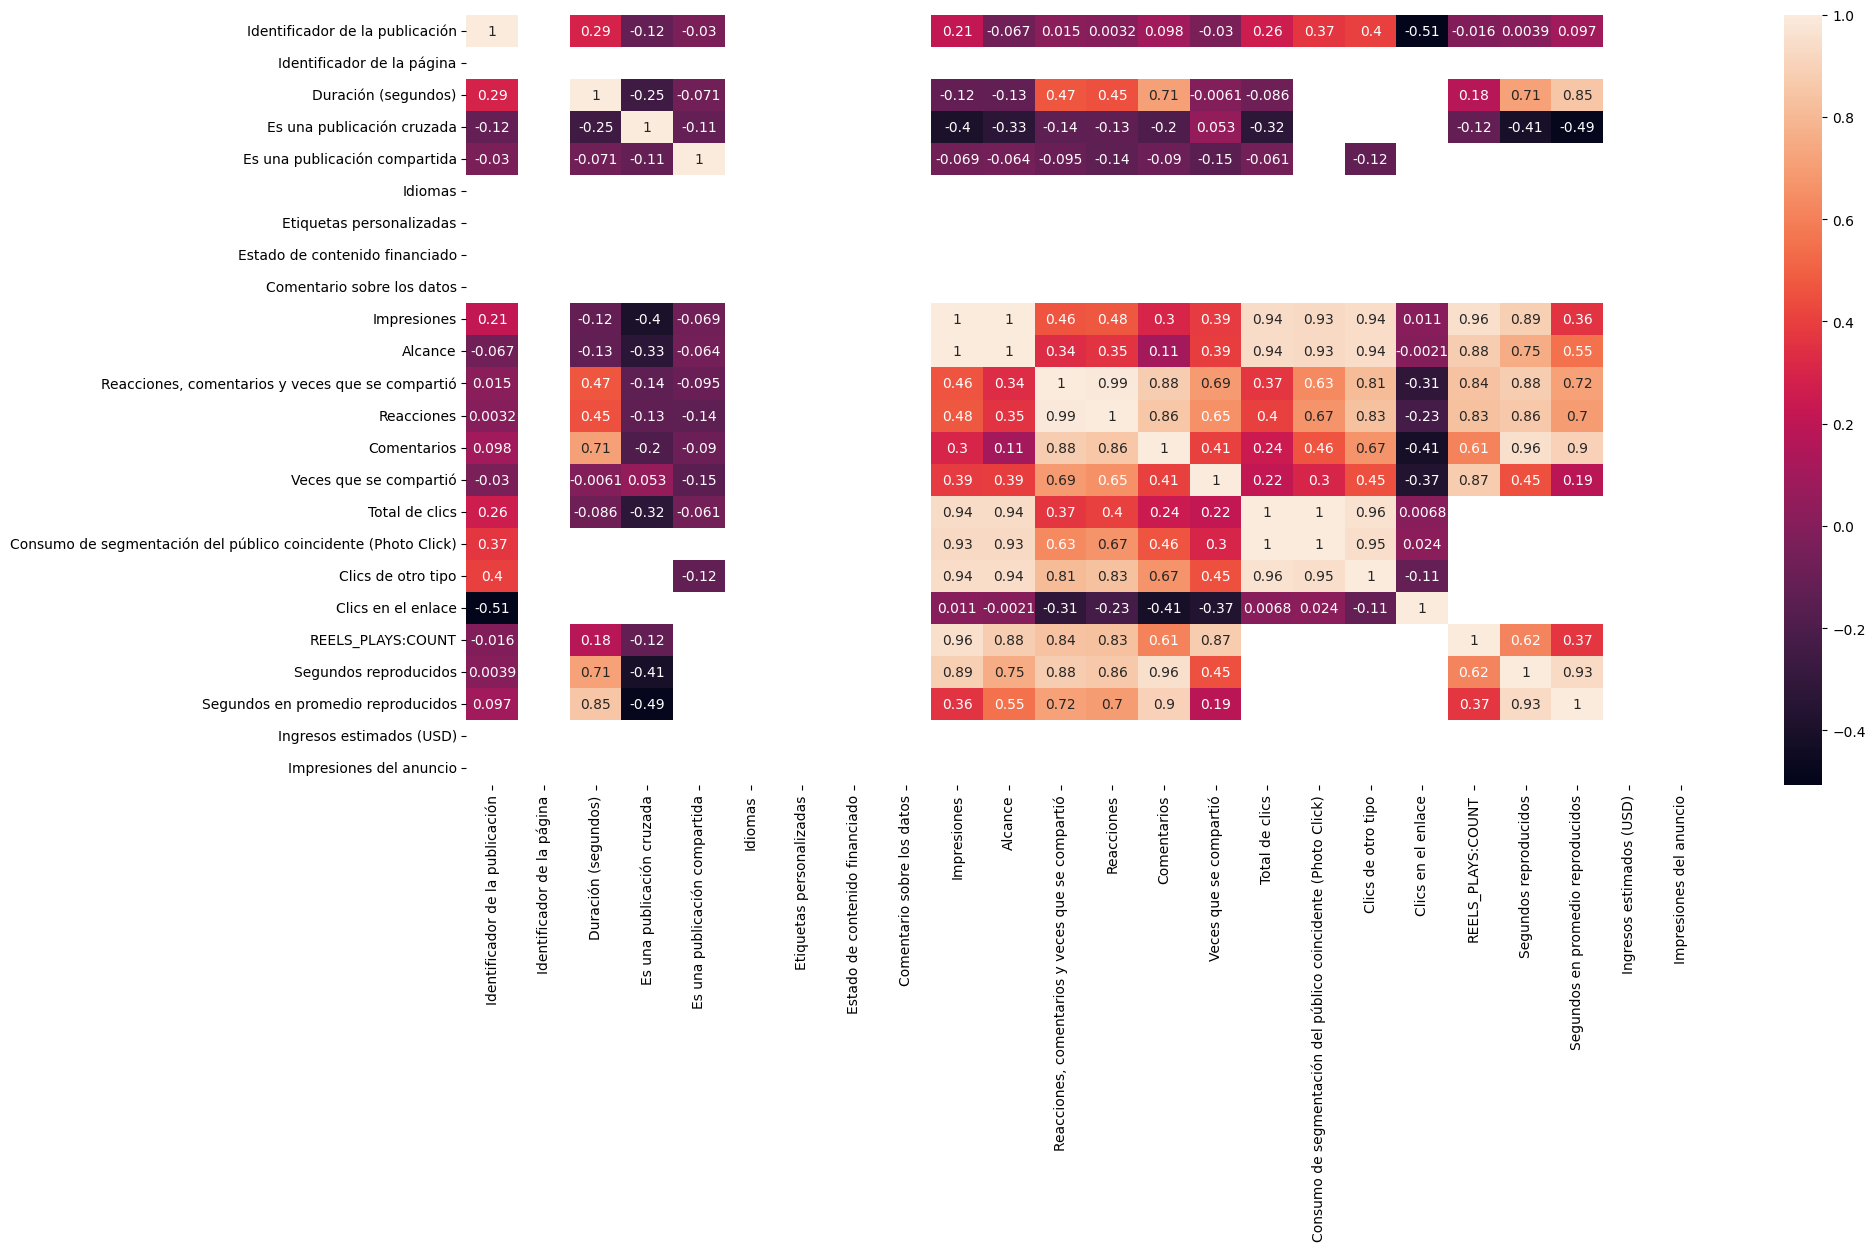

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(numerical_data_municipalidad_facebook.corr(),  annot=True)

In [ ]:
# Encuentra el índice de la fila con el alcance máximo
indice_alcance_maximo = data_municipalidad_facebook['Alcance'].idxmax()

# Obtén el identificador de la publicación con el alcance máximo
id_publicacion_alcance_maximo = data_municipalidad_facebook.loc[indice_alcance_maximo, 'Identificador de la publicación']

# Imprime el identificador de la publicación con el alcance máximo
print("Identificador de la publicación con mayor alcance:", id_publicacion_alcance_maximo)

# Encuentra el índice de la fila con el alcance máximo
indice_alcance_maximo = data_municipalidad_facebook['Alcance'].idxmax()

# Obtén el identificador de la publicación con el alcance máximo
id_publicacion_alcance_maximo = data_municipalidad_facebook.loc[indice_alcance_maximo, 'Identificador de la publicación']

# Encuentra la descripción correspondiente a ese identificador de publicación
descripcion_alcance_maximo = data_municipalidad_facebook.loc[data_municipalidad_facebook['Identificador de la publicación'] == id_publicacion_alcance_maximo, 'Descripción'].values[0]

# Imprime la descripción correspondiente al ID con mayor alcance
print("Descripción de la publicación con mayor alcance (ID:", id_publicacion_alcance_maximo, "):", descripcion_alcance_maximo)

Identificador de la publicación con mayor alcance: 984736253693707
Descripción de la publicación con mayor alcance (ID: 984736253693707 ): nan


In [ ]:
import pandas as pd

# Encuentra el índice de la fila con el alcance máximo (primera publicación con mayor alcance)
indice_alcance_maximo = data_municipalidad_facebook['Alcance'].idxmax()

# Obtén el identificador de la primera publicación con mayor alcance
id_publicacion_alcance_maximo = data_municipalidad_facebook.loc[indice_alcance_maximo, 'Identificador de la publicación']

# Excluye la fila correspondiente a la publicación con el alcance máximo actual
data_excluyendo_maximo = data_municipalidad_facebook.drop(index=indice_alcance_maximo)

# Encuentra el índice de la fila con el alcance máximo en el DataFrame restante (segunda publicación con mayor alcance)
indice_segundo_alcance_maximo = data_excluyendo_maximo['Alcance'].idxmax()

# Obtén el identificador de la segunda publicación con mayor alcance
id_segundo_publicacion_alcance_maximo = data_excluyendo_maximo.loc[indice_segundo_alcance_maximo, 'Identificador de la publicación']

# Encuentra la descripción correspondiente a la segunda publicación con mayor alcance
descripcion_segundo_alcance_maximo = data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicación'] == id_segundo_publicacion_alcance_maximo, 'Descripción'].values[0]

# Extrae la fecha de la segunda publicación con mayor alcance (desde la columna 'Hora de publicación')
fecha_segundo_publicacion_alcance_maximo = pd.to_datetime(data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicación'] == id_segundo_publicacion_alcance_maximo, 'Hora de publicación']).dt.date.values[0]

# Imprime el identificador, descripción y fecha de la segunda publicación con mayor alcance
print("Identificador de la segunda publicación con mayor alcance:", id_segundo_publicacion_alcance_maximo)
print("Descripción de la segunda publicación con mayor alcance:", descripcion_segundo_alcance_maximo)
print("Fecha de la segunda publicación con mayor alcance:", fecha_segundo_publicacion_alcance_maximo)


Identificador de la segunda publicación con mayor alcance: 984659463701386
Descripción de la segunda publicación con mayor alcance: nan
Fecha de la segunda publicación con mayor alcance: 2024-10-26


In [ ]:
import pandas as pd

# Encuentra el índice de la fila con el alcance máximo (primera publicación con mayor alcance)
indice_alcance_maximo = data_municipalidad_facebook['Reacciones, comentarios y veces que se compartió'].idxmax()

# Obtén el identificador de la primera publicación con mayor alcance
id_publicacion_alcance_maximo = data_municipalidad_facebook.loc[indice_alcance_maximo, 'Identificador de la publicación']

# Excluye la fila correspondiente a la publicación con el alcance máximo actual
data_excluyendo_maximo = data_municipalidad_facebook.drop(index=indice_alcance_maximo)

# Encuentra el índice de la fila con el alcance máximo en el DataFrame restante (segunda publicación con mayor alcance)
indice_segundo_alcance_maximo = data_excluyendo_maximo['Reacciones, comentarios y veces que se compartió'].idxmax()

# Obtén el identificador de la segunda publicación con mayor alcance
id_segundo_publicacion_alcance_maximo = data_excluyendo_maximo.loc[indice_segundo_alcance_maximo, 'Identificador de la publicación']

# Encuentra la descripción correspondiente a la segunda publicación con mayor alcance
descripcion_segundo_alcance_maximo = data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicación'] == id_segundo_publicacion_alcance_maximo, 'Descripción'].values[0]

# Extrae la fecha de la segunda publicación con mayor alcance (desde la columna 'Hora de publicación')
fecha_segundo_publicacion_alcance_maximo = pd.to_datetime(data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicación'] == id_segundo_publicacion_alcance_maximo, 'Hora de publicación']).dt.date.values[0]

# Imprime el identificador, descripción y fecha de la segunda publicación con mayor alcance
print("Identificador de la segunda publicación con mayores reacciones:", id_segundo_publicacion_alcance_maximo)
print("Descripción de la segunda publicación con mayores reacciones:", descripcion_segundo_alcance_maximo)
print("Fecha de la segunda publicación con mayor alcance:", fecha_segundo_publicacion_alcance_maximo)


Identificador de la segunda publicación con mayores reacciones: 984933583673974
Descripción de la segunda publicación con mayores reacciones: MUNDO DE LA FANTASÍA 👻 vivimos hoy con todos los niños del CORAZÓN DEL VALLE 😍💙
Fecha de la segunda publicación con mayor alcance: 2024-10-26


In [ ]:
# Encuentra el índice de la fila con el alcance máximo
indice_reacciones_maximo = data_municipalidad_facebook['Reacciones, comentarios y veces que se compartió'].idxmax()

# Obtén el identificador de la publicación con el alcance máximo
id_publicacion_reacciones_maximo = data_municipalidad_facebook.loc[indice_reacciones_maximo, 'Identificador de la publicación']

# Imprime el identificador de la publicación con el alcance máximo
print("Identificador de la publicación con mayor alcance:", id_publicacion_reacciones_maximo)

# Encuentra el índice de la fila con el alcance máximo
indice_reacciones_maximo = data_municipalidad_facebook['Reacciones, comentarios y veces que se compartió'].idxmax()

# Obtén el identificador de la publicación con el alcance máximo
id_publicacion_reacciones_maximo = data_municipalidad_facebook.loc[indice_reacciones_maximo, 'Identificador de la publicación']

# Encuentra la descripción correspondiente a ese identificador de publicación
descripcion_reacciones_maximo = data_municipalidad_facebook.loc[data_municipalidad_facebook['Identificador de la publicación'] == id_publicacion_reacciones_maximo, 'Descripción'].values[0]

# Imprime la descripción correspondiente al ID con mayor alcance
print("Descripción de la publicación con mayores reacciones (ID:", id_publicacion_reacciones_maximo, "):", descripcion_reacciones_maximo)

Identificador de la publicación con mayor alcance: 905026751442620
Descripción de la publicación con mayores reacciones (ID: 905026751442620 ): Bienvenidos a este espacio con nuestro alcalde @[100050197852350:2048:Gustavo Vélez], hoy en compañía del periodista Jorge Adrián Orozco.  #ParaSerFelices

@[783956240438377:49210:@seguidores] @[815630467270954:49210:@fans destacados]


In [ ]:
import pandas as pd

# Crear una nueva columna que sume las interacciones (Reacciones, Comentarios y Veces que se compartió)
data_municipalidad_data_vital['Interacciones_totales'] = (
    data_municipalidad_data_vital['Reacciones'] +
    data_municipalidad_data_vital['Comentarios'] +
    data_municipalidad_data_vital['Veces que se compartió']
)

# Encuentra el índice de la primera publicación con mayor cantidad de interacciones
indice_interacciones_maximo = data_municipalidad_data_vital['Interacciones_totales'].idxmax()

# Obtén el identificador de la primera publicación con mayor interacciones
id_publicacion_interacciones_maximo = data_municipalidad_data_vital.loc[indice_interacciones_maximo, 'Identificador de la publicación']

# Excluye la fila correspondiente a la publicación con mayor interacciones
data_excluyendo_maximo = data_municipalidad_data_vital.drop(index=indice_interacciones_maximo)

# Encuentra el índice de la segunda publicación con mayor interacciones
indice_segundo_interacciones_maximo = data_excluyendo_maximo['Interacciones_totales'].idxmax()

# Obtén el identificador de la segunda publicación con mayor interacciones
id_segundo_publicacion_interacciones_maximo = data_excluyendo_maximo.loc[indice_segundo_interacciones_maximo, 'Identificador de la publicación']

# Excluye la fila correspondiente a la segunda publicación con mayor interacciones
data_excluyendo_segundo_maximo = data_excluyendo_maximo.drop(index=indice_segundo_interacciones_maximo)

# Encuentra el índice de la tercera publicación con mayor interacciones
indice_tercer_interacciones_maximo = data_excluyendo_segundo_maximo['Interacciones_totales'].idxmax()

# Obtén el identificador de la tercera publicación con mayor interacciones
id_tercer_publicacion_interacciones_maximo = data_excluyendo_segundo_maximo.loc[indice_tercer_interacciones_maximo, 'Identificador de la publicación']

# Obtén las descripciones de las tres publicaciones con mayor interacciones
descripcion_primera_interacciones_maximo = data_municipalidad_data_vital.loc[data_municipalidad_data_vital['Identificador de la publicación'] == id_publicacion_interacciones_maximo, 'Descripción'].values[0]
descripcion_segunda_interacciones_maximo = data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicación'] == id_segundo_publicacion_interacciones_maximo, 'Descripción'].values[0]
descripcion_tercera_interacciones_maximo = data_excluyendo_segundo_maximo.loc[data_excluyendo_segundo_maximo['Identificador de la publicación'] == id_tercer_publicacion_interacciones_maximo, 'Descripción'].values[0]

# Imprime los resultados
print("Identificador de la primera publicación con mayor interacciones:", id_publicacion_interacciones_maximo)
print("Descripción de la primera publicación con mayor interacciones:", descripcion_primera_interacciones_maximo)

print("Identificador de la segunda publicación con mayor interacciones:", id_segundo_publicacion_interacciones_maximo)
print("Descripción de la segunda publicación con mayor interacciones:", descripcion_segunda_interacciones_maximo)

print("Identificador de la tercera publicación con mayor interacciones:", id_tercer_publicacion_interacciones_maximo)
print("Descripción de la tercera publicación con mayor interacciones:", descripcion_tercera_interacciones_maximo)


Identificador de la primera publicación con mayor interacciones: 905026751442620
Descripción de la primera publicación con mayor interacciones: Bienvenidos a este espacio con nuestro alcalde @[100050197852350:2048:Gustavo Vélez], hoy en compañía del periodista Jorge Adrián Orozco.  #ParaSerFelices

@[783956240438377:49210:@seguidores] @[815630467270954:49210:@fans destacados]
Identificador de la segunda publicación con mayor interacciones: 984933583673974
Descripción de la segunda publicación con mayor interacciones: MUNDO DE LA FANTASÍA 👻 vivimos hoy con todos los niños del CORAZÓN DEL VALLE 😍💙
Identificador de la tercera publicación con mayor interacciones: 478051311880608
Descripción de la tercera publicación con mayor interacciones: #ParaSerFelices


<ipython-input-33-447ea4eaeb56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_municipalidad_data_vital['Interacciones_totales'] = (


In [ ]:
# Encuentra el índice de la fila con el alcance mínimo
indice_alcance_minimo = data_municipalidad_facebook['Alcance'].idxmin()

# Obtén el identificador de la publicación con el alcance mínimo
id_publicacion_alcance_minimo = data_municipalidad_facebook.loc[indice_alcance_minimo, 'Identificador de la publicación']

# Imprime el identificador de la publicación con menor alcance
print("Identificador de la publicación con menor alcance:", id_publicacion_alcance_minimo)

# Encuentra la descripción correspondiente a ese identificador de publicación
descripcion_alcance_minimo = data_municipalidad_facebook.loc[data_municipalidad_facebook['Identificador de la publicación'] == id_publicacion_alcance_minimo, 'Descripción'].values[0]

# Imprime la descripción correspondiente al ID con menor alcance
print("Descripción de la publicación con menor alcance (ID:", id_publicacion_alcance_minimo, "):", descripcion_alcance_minimo)


Identificador de la publicación con menor alcance: 965758135591519
Descripción de la publicación con menor alcance (ID: 965758135591519 ): nan


In [ ]:
# Encuentra el índice de la fila con el alcance mínimo
indice_alcance_minimo = data_municipalidad_facebook['Alcance'].idxmin()

# Obtén el identificador de la publicación con el alcance mínimo
id_publicacion_alcance_minimo = data_municipalidad_facebook.loc[indice_alcance_minimo, 'Identificador de la publicación']

# Imprime el identificador de la publicación con menor alcance
print("Identificador de la publicación con menor alcance:", id_publicacion_alcance_minimo)

# Encuentra la descripción correspondiente a ese identificador de publicación
descripcion_alcance_minimo = data_municipalidad_facebook.loc[data_municipalidad_facebook['Identificador de la publicación'] == id_publicacion_alcance_minimo, 'Descripción'].values[0]

# Imprime la descripción correspondiente al ID con menor alcance
print("Descripción de la publicación con menor alcance (ID:", id_publicacion_alcance_minimo, "):", descripcion_alcance_minimo)

# Encuentra los índices de las tres publicaciones con menor alcance
indices_tres_menores_alcances = data_municipalidad_facebook['Alcance'].nsmallest(3).index

# Obtén y imprime las descripciones de estas tres publicaciones
descripciones_tres_menores_alcances = data_municipalidad_facebook.loc[indices_tres_menores_alcances, 'Descripción'].values
print("Descripciones de las tres publicaciones con menor alcance:")
for descripcion in descripciones_tres_menores_alcances:
    print(descripcion)


Identificador de la publicación con menor alcance: 965758135591519
Descripción de la publicación con menor alcance (ID: 965758135591519 ): nan
Descripciones de las tres publicaciones con menor alcance:
nan
nan
¡Mejoramos la conectividad en nuestra zona rural! 🚜✨

Hemos intervenido más de 18 kilómetros lineales con canalización, embalastramiento y cuneteo, gracias al trabajo de la Administración Municipal a través de la Secretaría de Hábitat e Infraestructura. 🛤️💪 Nuestro objetivo es asegurar que todas las comunidades tengan acceso a vías en óptimas condiciones. ¡Seguimos construyendo un Tuluá más conectado! 🌱 #ParaSerFelices 💙💪🏼


In [ ]:
data_cuantitativa_vital_municipalidad_face= data_municipalidad_data_vital[['Duración (segundos)','Veces que se compartió','Alcance','Reacciones, comentarios y veces que se compartió','Reacciones','Comentarios']]
data_cuantitativa_vital_municipalidad_face.head()

,Duración (segundos),Veces que se compartió,Alcance,"Reacciones, comentarios y veces que se compartió",Reacciones,Comentarios
0,57,7,1454.0,62.0,54,1
1,68,6,538.0,33.0,26,1
2,67,12,918.0,58.0,41,5
3,1781,4,546.0,78.0,65,9
4,3183,3,728.0,67.0,60,4


<Axes: >

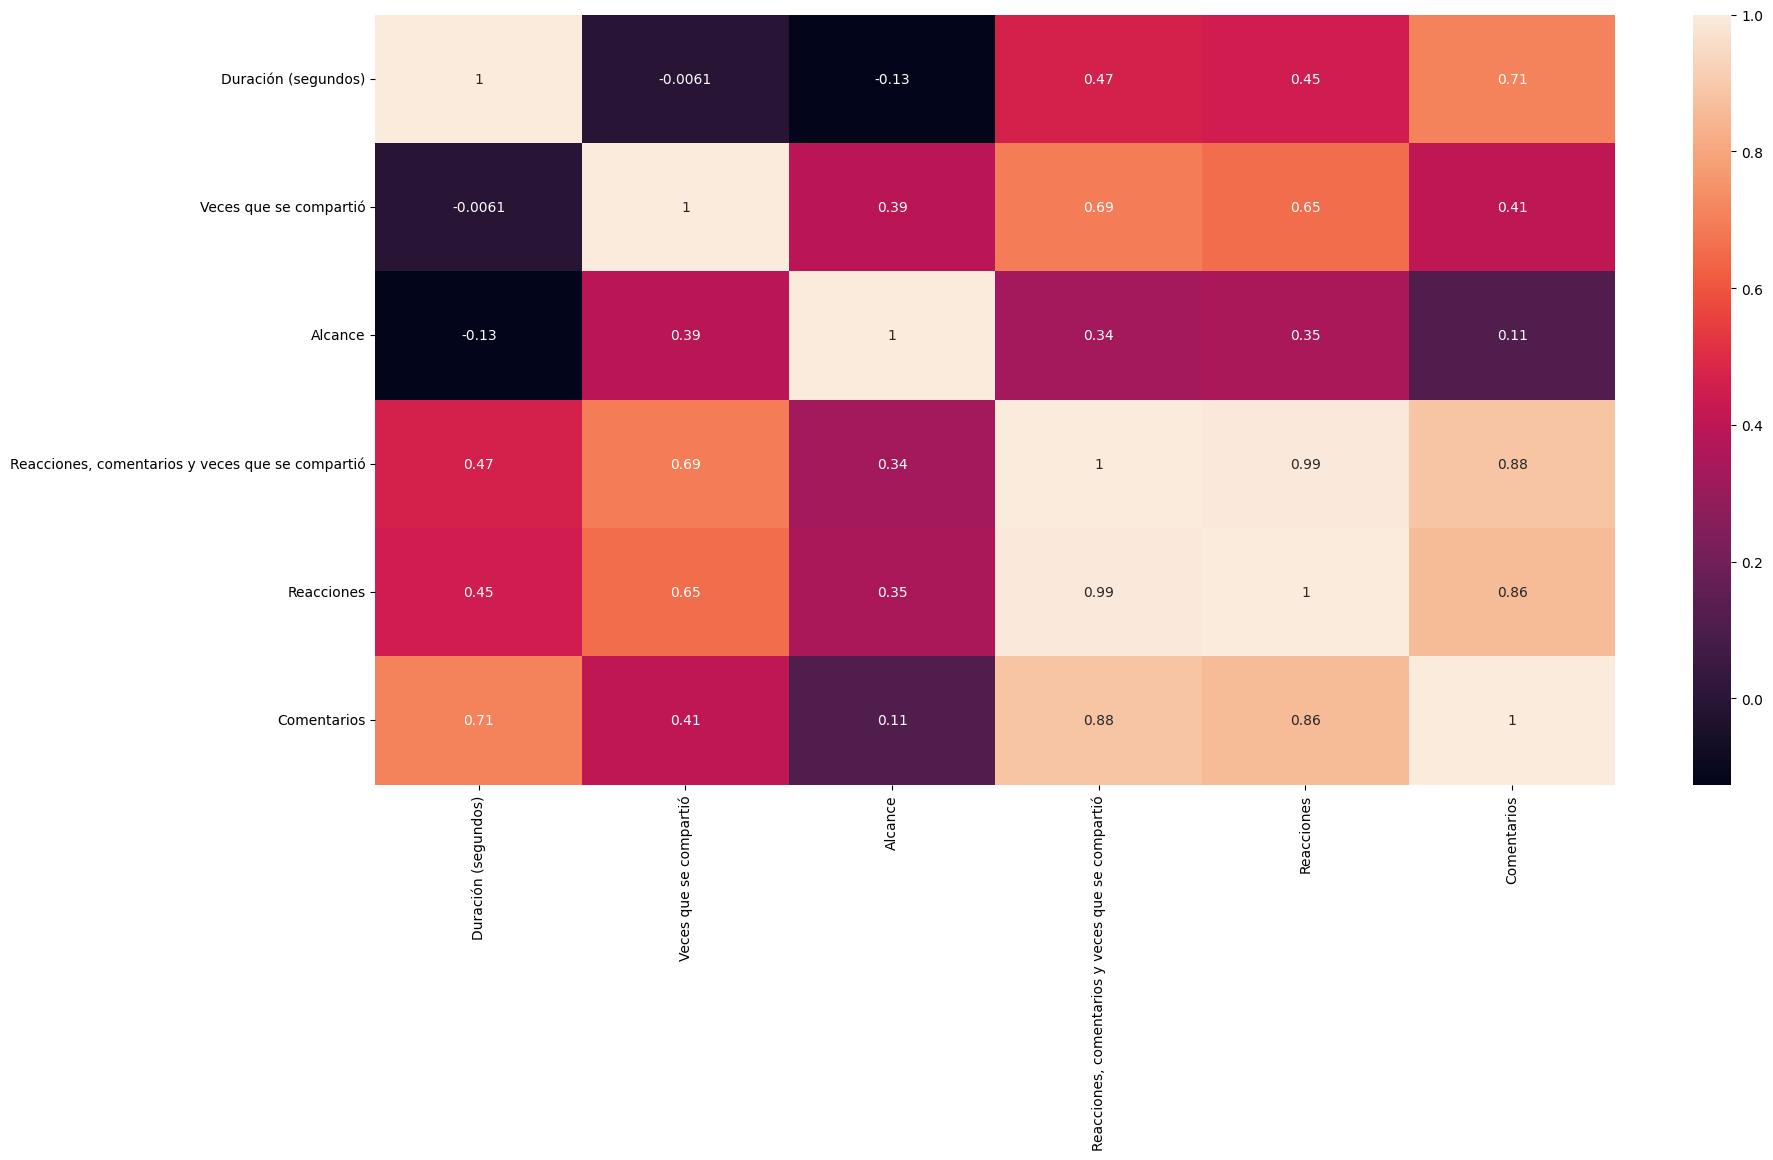

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_cuantitativa_vital_municipalidad_face.corr(),  annot=True)

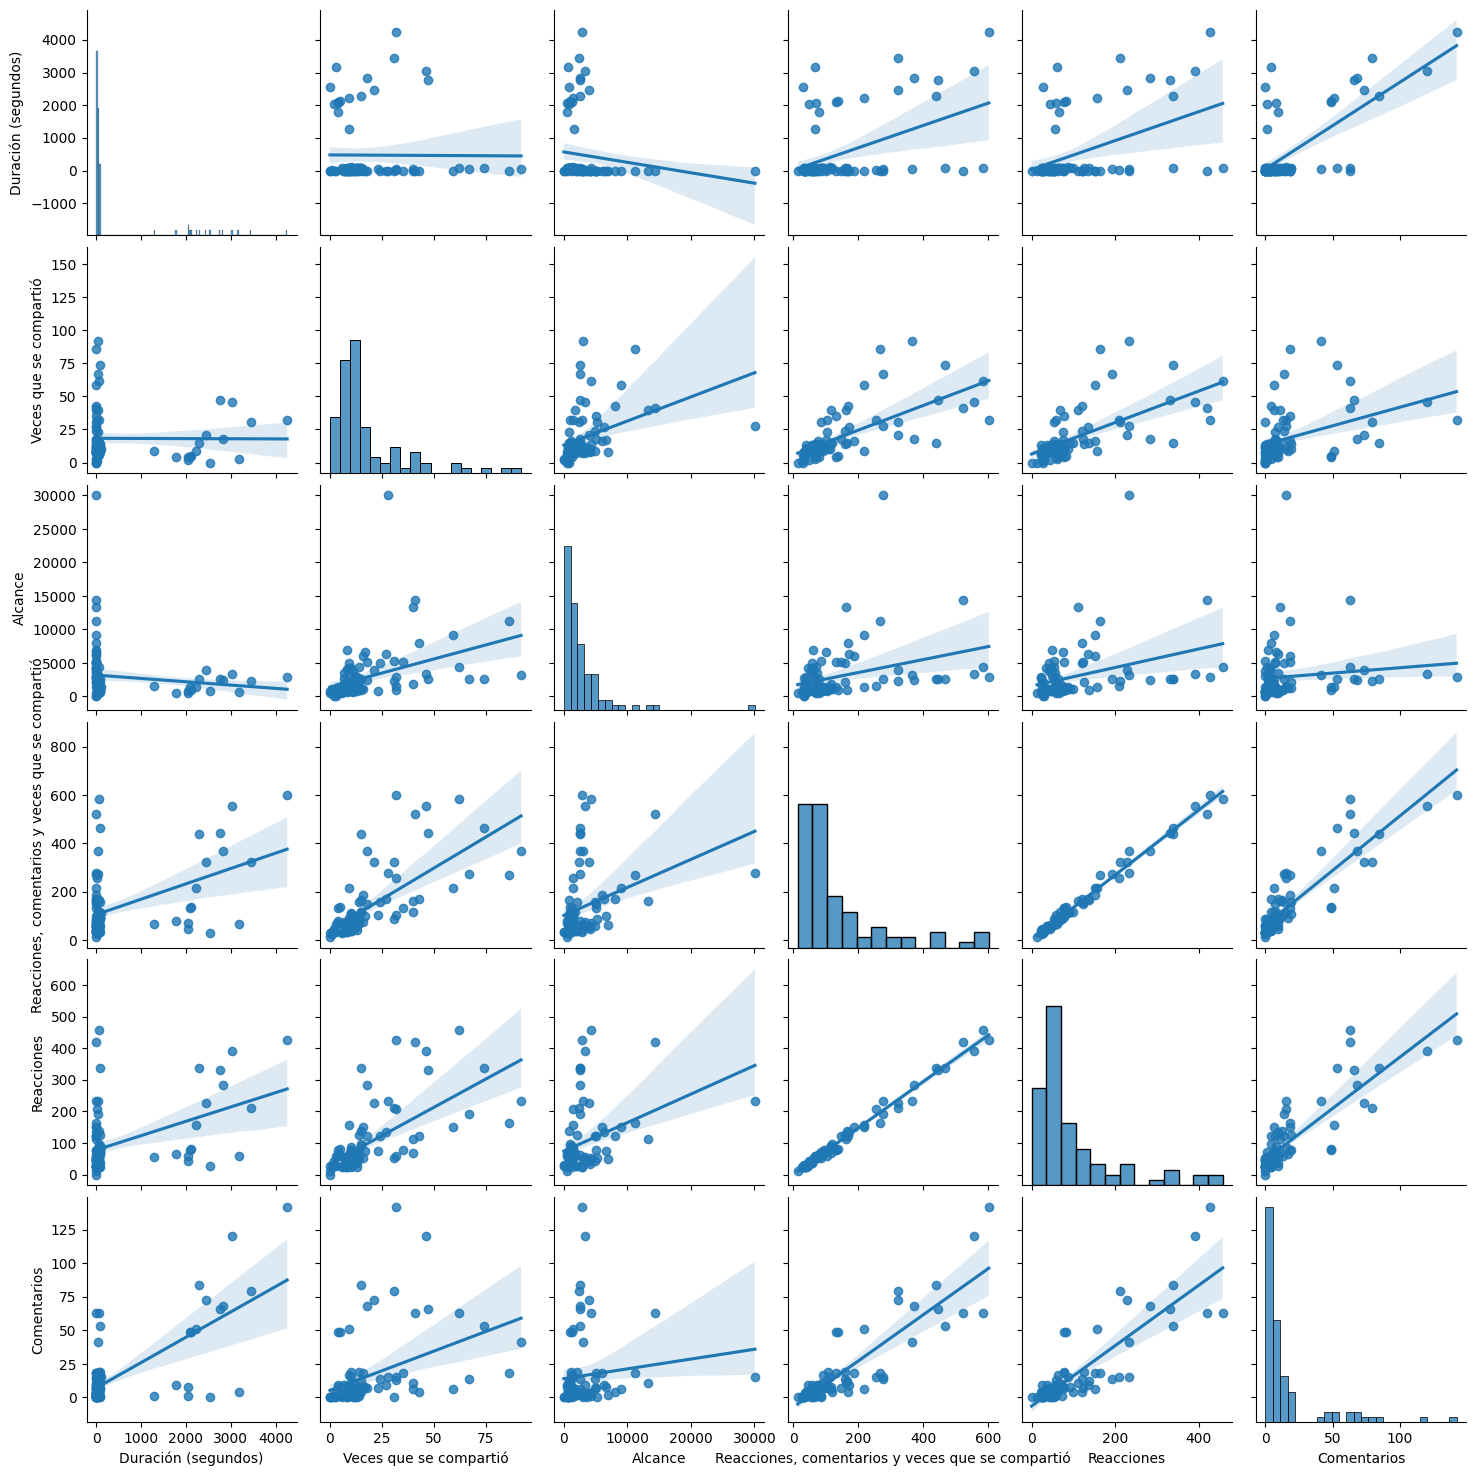

In [ ]:
sns.pairplot(data_cuantitativa_vital_municipalidad_face, kind='reg')

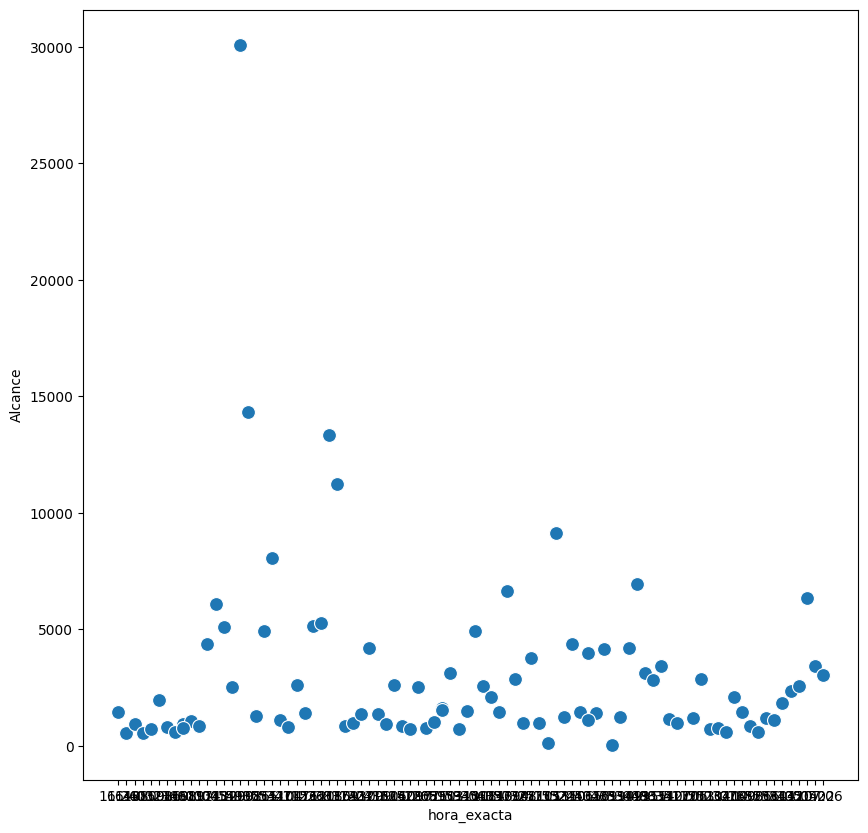

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_data_vital, x='hora_exacta', y='Alcance', s=100)

# Mostrar el gráfico
plt.show()

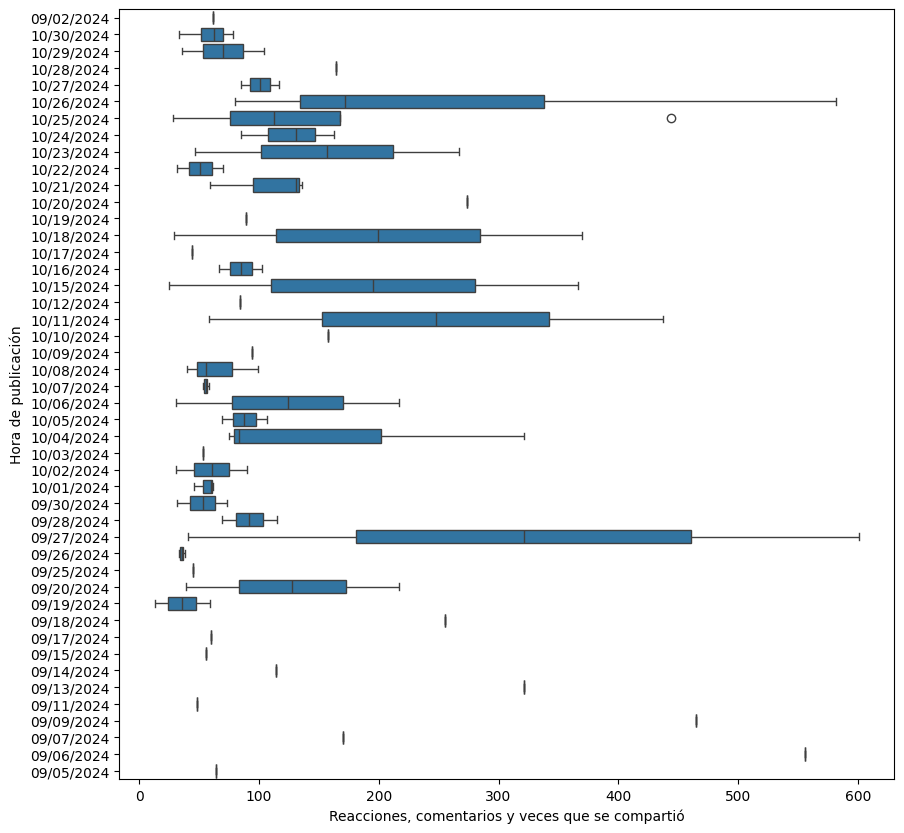

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el boxplot con seaborn
sns.boxplot(x=data_municipalidad_data_vital['Reacciones, comentarios y veces que se compartió'], y=data_municipalidad_data_vital['Hora de publicación'])

# Configurar etiquetas de los ejes
plt.xlabel('Reacciones, comentarios y veces que se compartió')
plt.ylabel('Hora de publicación')

# Mostrar el gráfico
plt.show()


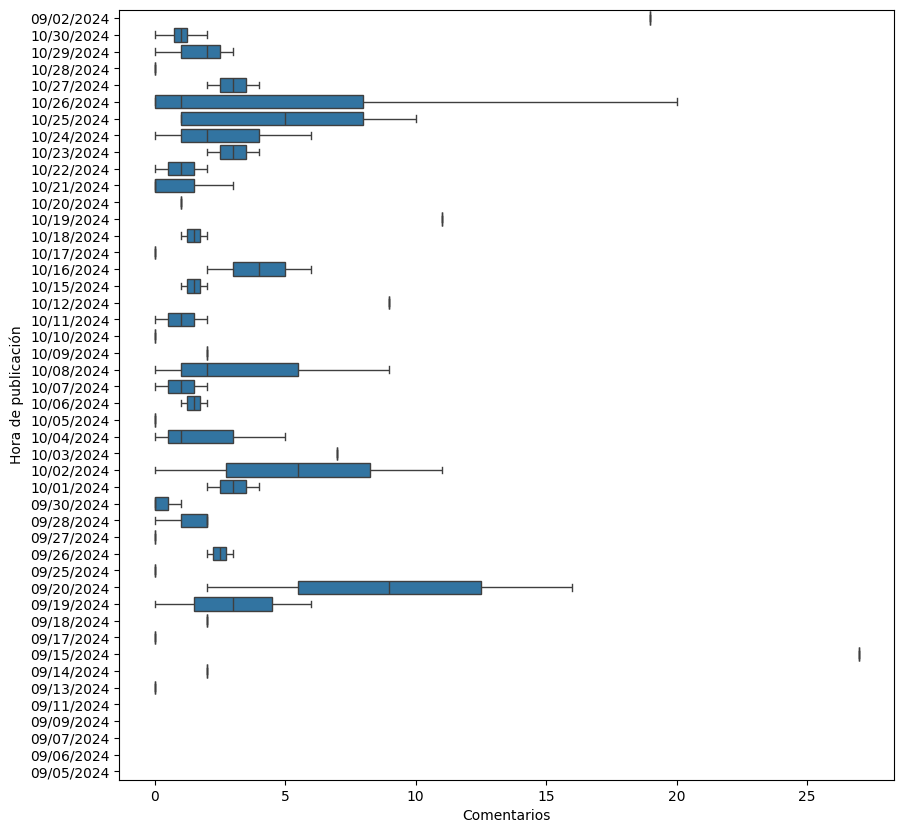

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el boxplot con seaborn
sns.boxplot(x=data_municipalidad_instagram['Comentarios'], y=data_municipalidad_data_vital['Hora de publicación'])

# Configurar etiquetas de los ejes
plt.xlabel('Comentarios')
plt.ylabel('Hora de publicación')

# Mostrar el gráfico
plt.show()


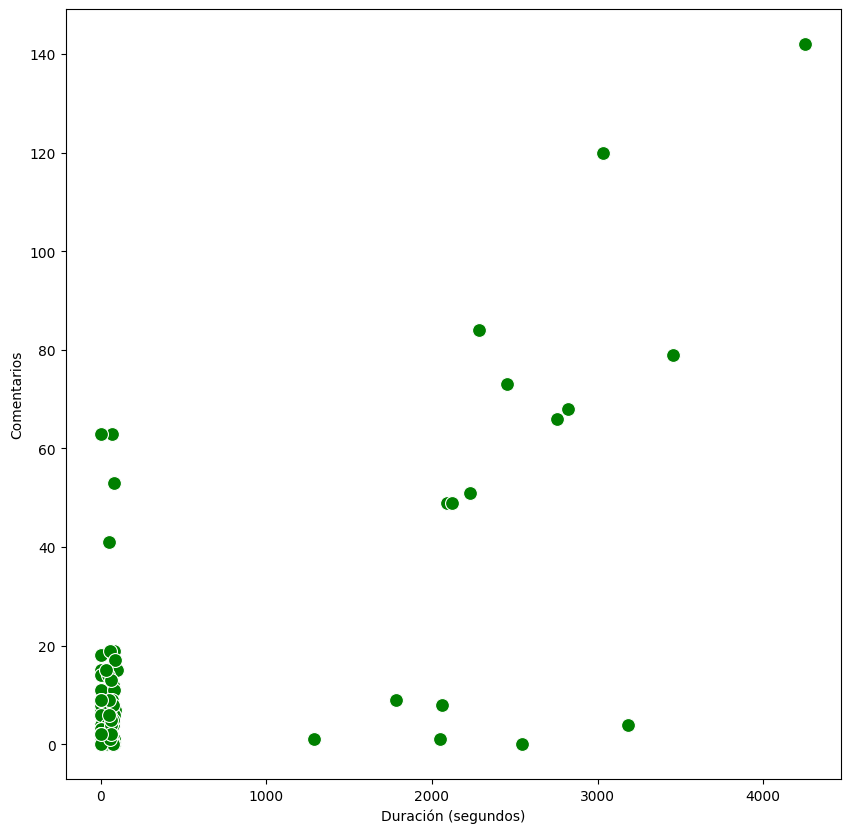

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_cuantitativa_vital_municipalidad_face, x='Duración (segundos)', y='Comentarios', s=100, color='green')

# Mostrar el gráfico
plt.show()

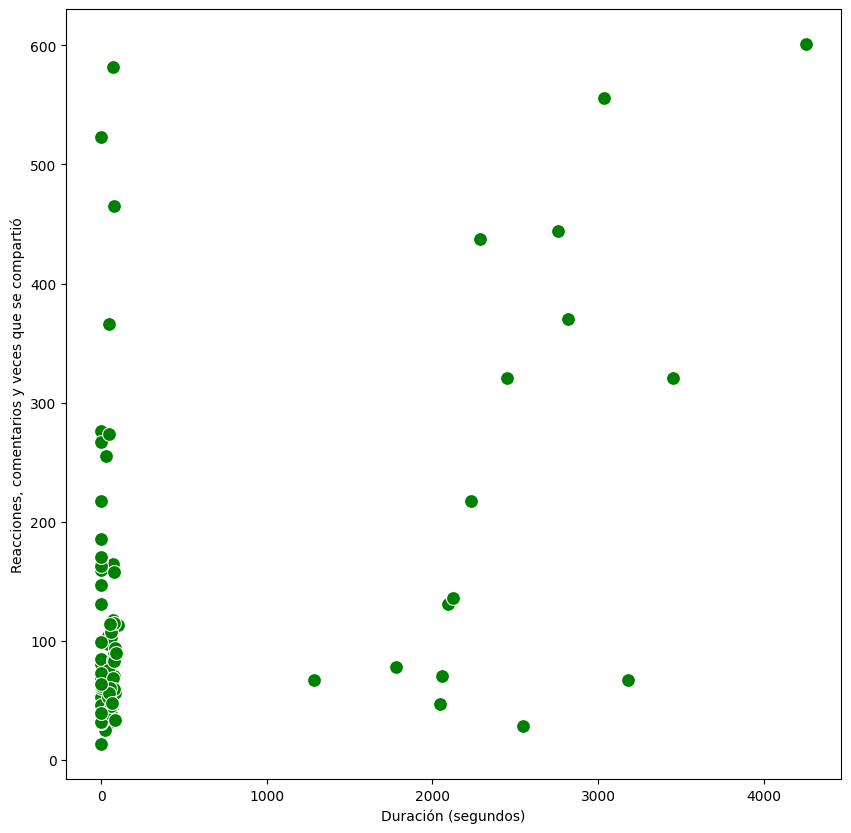

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_data_vital, x='Duración (segundos)', y='Reacciones, comentarios y veces que se compartió', s=100, color='green')

# Mostrar el gráfico
plt.show()

In [ ]:
data_correla= data_municipalidad_facebook[['Comentarios', 'Duración (segundos)', 'Total de clics', 'Reacciones','Alcance']]
data_correla.head()

,Comentarios,Duración (segundos),Total de clics,Reacciones,Alcance
0,1,57,0.0,54,1454.0
1,1,68,0.0,26,538.0
2,5,67,0.0,41,918.0
3,9,1781,NaN,65,546.0
4,4,3183,NaN,60,728.0


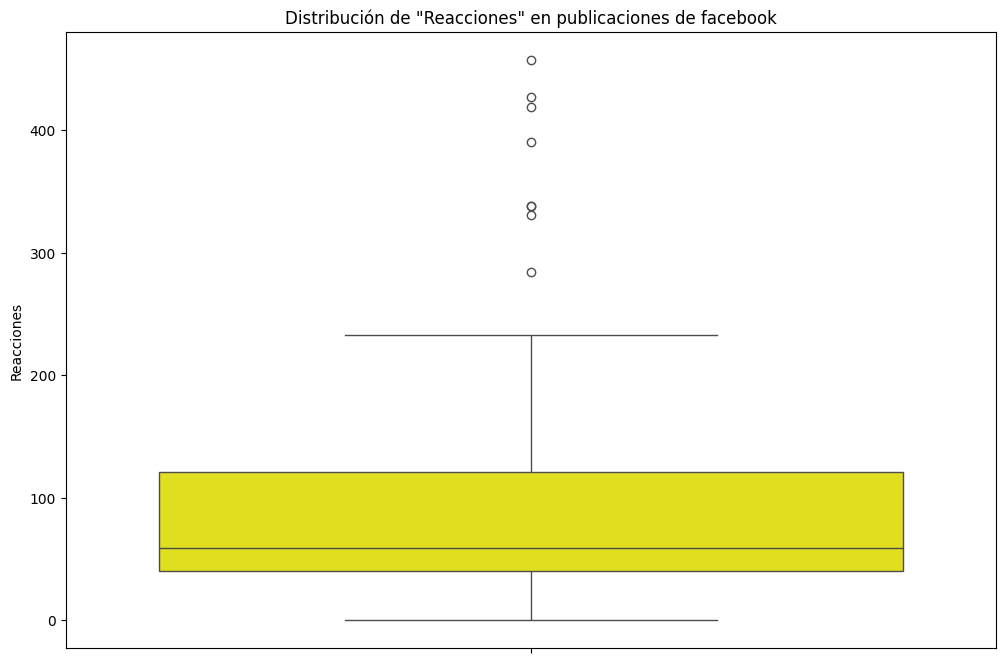

In [ ]:
# Suponiendo que 'data_cuantitativa_proyectos_insta_tipo_publica' es el DataFrame filtrado con los datos relevantes
# Crear el gráfico boxplot con tamaño aumentado y color amarillo
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_municipalidad_data_vital['Reacciones'], color='yellow')
plt.title('Distribución de "Reacciones" en publicaciones de facebook')
plt.show()

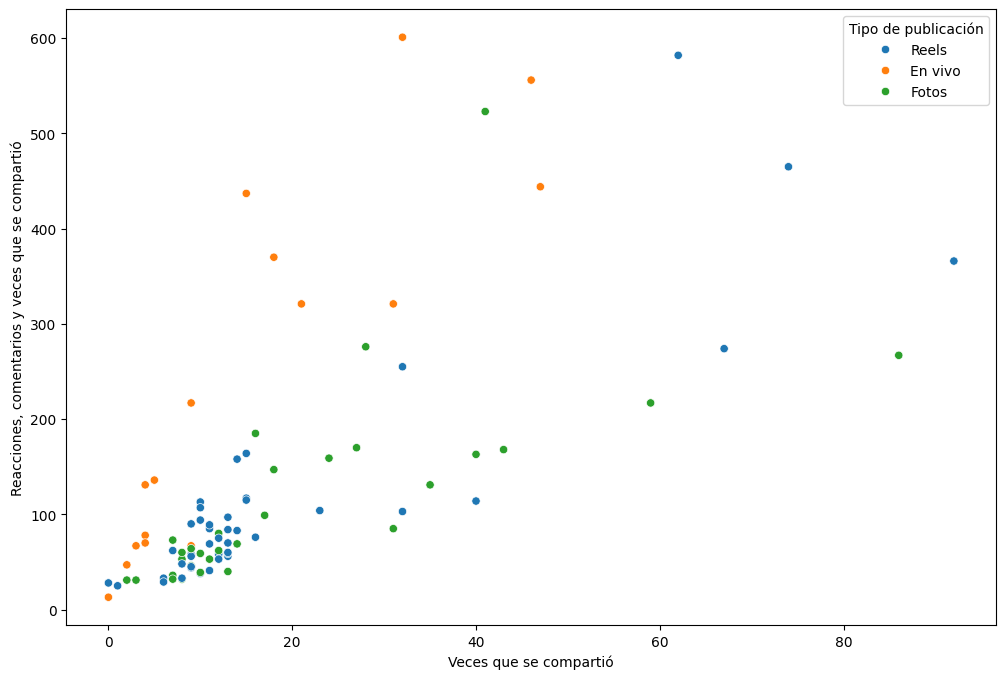

In [ ]:
# Crear la gráfica de dispersión y aumentar el tamaño
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data_municipalidad_data_vital,
    x='Veces que se compartió',
    y='Reacciones, comentarios y veces que se compartió',
    hue='Tipo de publicación'
)

# Mostrar la gráfica
plt.show()

In [ ]:
data_cuantitativa_municipalidad_insta= data_municipalidad_instagram[['Veces que se guardó','Impresiones','Veces que se compartió','Alcance', 'Me gusta','Reproducciones','Comentarios','Seguimientos','Duración (segundos)']]
data_cuantitativa_municipalidad_insta.head()

,Veces que se guardó,Impresiones,Veces que se compartió,Alcance,Me gusta,Reproducciones,Comentarios,Seguimientos,Duración (segundos)
0,3,4972.0,31,3802.0,355,NaN,19,1.0,0
1,0,1602.0,2,1322.0,35,2149.0,2,2.0,56
2,0,1683.0,3,1416.0,33,NaN,1,NaN,68
3,3,1856.0,7,1704.0,62,NaN,0,2.0,67
4,0,NaN,2,NaN,69,NaN,1,NaN,0


In [ ]:
data_cuantitativa_municipalidad_insta.describe()

,Veces que se guardó,Impresiones,Veces que se compartió,Alcance,Me gusta,Reproducciones,Comentarios,Seguimientos,Duración (segundos)
count,86.000000,72.000000,86.000000,72.000000,86.000000,7.0000,86.000000,29.000000,86.000000
mean,1.593023,3162.305556,10.465116,2535.875000,106.279070,2555.0000,3.151163,2.206897,244.825581
std,2.313021,2237.272803,14.502493,1670.492539,102.037438,630.9477,4.873741,2.024481,785.209005
min,0.000000,578.000000,0.000000,551.000000,24.000000,1663.0000,0.000000,1.000000,0.000000
25%,0.000000,1582.000000,2.000000,1288.500000,42.250000,2089.5000,0.000000,1.000000,0.000000
50%,1.000000,2320.000000,5.000000,1906.000000,64.000000,2623.0000,2.000000,1.000000,49.000000
75%,2.000000,4356.750000,10.000000,3293.750000,124.250000,2998.0000,3.000000,2.000000,68.000000
max,11.000000,9754.000000,67.000000,7371.000000,534.000000,3424.0000,27.000000,9.000000,4243.000000


<Axes: >

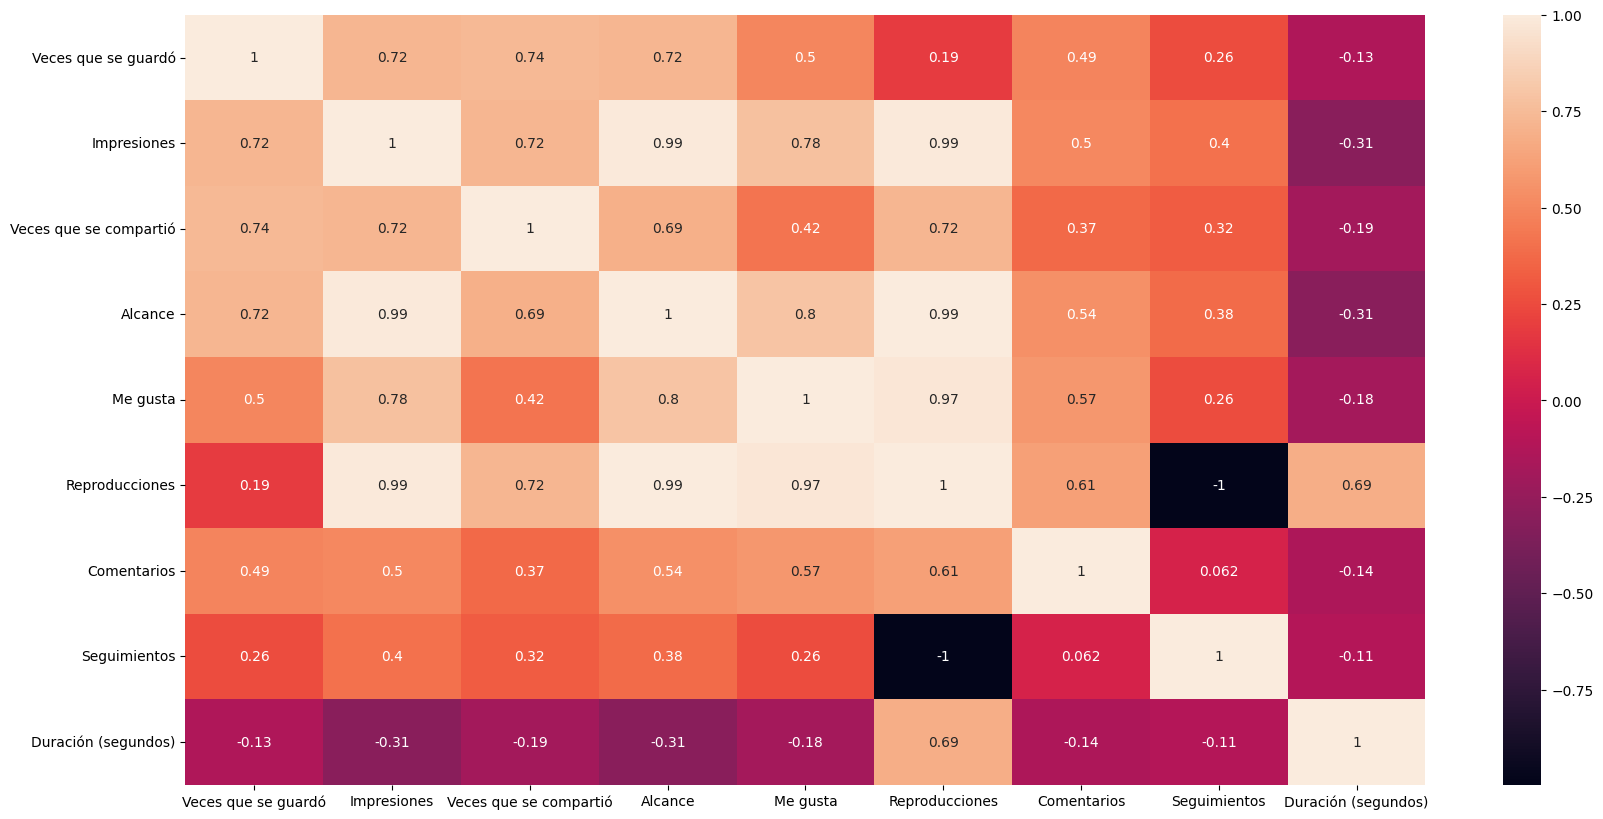

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_cuantitativa_municipalidad_insta.corr(),  annot=True)

count    29.000000
mean      2.206897
std       2.024481
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       9.000000
Name: Seguimientos, dtype: float64


<Axes: >

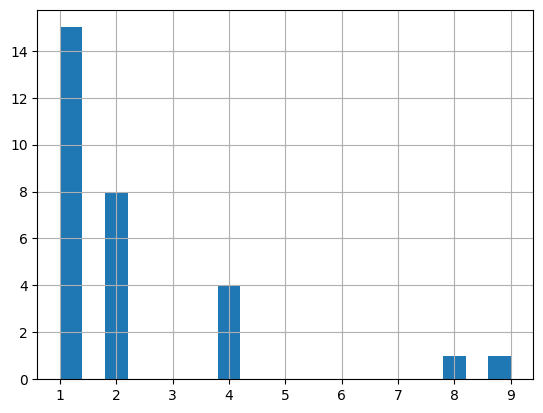

In [ ]:
# Resumen estadístico básico
print(data_cuantitativa_municipalidad_insta['Seguimientos'].describe())

# Histograma de "Seguimientos"
data_cuantitativa_municipalidad_insta['Seguimientos'].hist(bins=20)

In [ ]:
correlacion_seguimientos = data_cuantitativa_municipalidad_insta.corr()['Seguimientos']
print(correlacion_seguimientos)


Veces que se guardó       0.258172
Impresiones               0.404316
Veces que se compartió    0.317641
Alcance                   0.381151
Me gusta                  0.258370
Reproducciones           -0.997031
Comentarios               0.061842
Seguimientos              1.000000
Duración (segundos)      -0.111840
Name: Seguimientos, dtype: float64


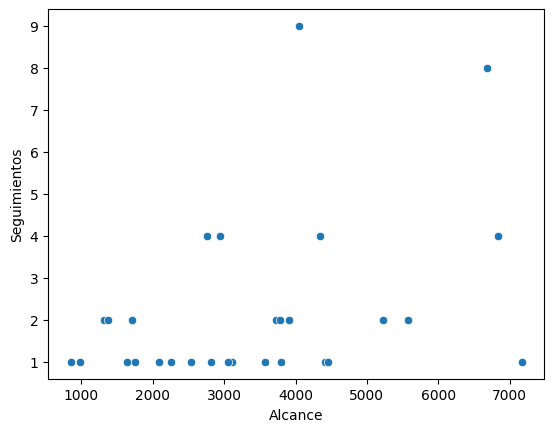

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión de "Seguimientos" vs "Alcance"
sns.scatterplot(x=data_cuantitativa_municipalidad_insta['Alcance'], y=data_cuantitativa_municipalidad_insta['Seguimientos'])
plt.show()


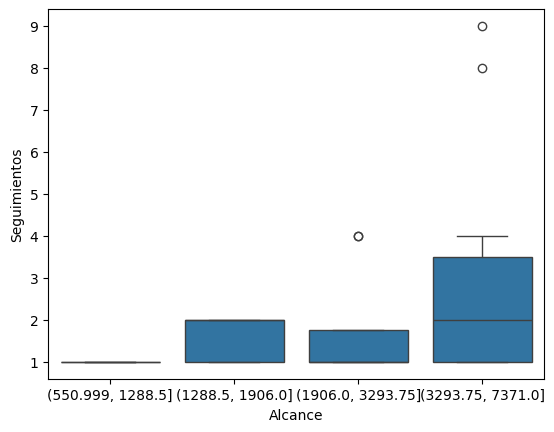

In [ ]:
sns.boxplot(x=pd.qcut(data_cuantitativa_municipalidad_insta['Alcance'], 4), y=data_cuantitativa_municipalidad_insta['Seguimientos'])
plt.show()


In [ ]:
# Verificar si hay valores NaN en el dataset
print(data_cuantitativa_municipalidad_insta.isnull().sum())

# Eliminar filas que contengan NaN
data_cuantitativa_municipalidad_insta = data_cuantitativa_municipalidad_insta.dropna()

# Reemplazar NaN con la media de cada columna
data_cuantitativa_municipalidad_insta = data_cuantitativa_municipalidad_insta.fillna(data_cuantitativa_municipalidad_insta.mean())

# Verificar si hay valores infinitos en el dataset
print(np.isinf(data_cuantitativa_municipalidad_insta).sum())

# Reemplazar valores infinitos con NaN y luego eliminarlos
data_cuantitativa_municipalidad_insta.replace([np.inf, -np.inf], np.nan, inplace=True)
data_cuantitativa_municipalidad_insta.dropna(inplace=True)

# Resumen estadístico para verificar los valores máximos en cada columna
print(data_cuantitativa_municipalidad_insta.describe())

from sklearn.preprocessing import StandardScaler

# Normalizar las columnas numéricas
scaler = StandardScaler()
data_cuantitativa_municipalidad_insta_scaled = scaler.fit_transform(data_cuantitativa_municipalidad_insta)

# Por ejemplo, si el valor en la columna 'Seguimientos' supera un umbral razonable
data_cuantitativa_municipalidad_insta = data_cuantitativa_municipalidad_insta[data_cuantitativa_municipalidad_insta['Seguimientos'] < 10000]



Veces que se guardó        0
Impresiones               14
Veces que se compartió     0
Alcance                   14
Me gusta                   0
Reproducciones            79
Comentarios                0
Seguimientos              57
Duración (segundos)        0
dtype: int64
Veces que se guardó       0
Impresiones               0
Veces que se compartió    0
Alcance                   0
Me gusta                  0
Reproducciones            0
Comentarios               0
Seguimientos              0
Duración (segundos)       0
dtype: int64
       Veces que se guardó  Impresiones  Veces que se compartió      Alcance  \
count             3.000000      3.00000                3.000000     3.000000   
mean              0.666667   1969.00000                5.333333  1647.333333   
std               0.577350    578.60954                4.163332   524.161553   
min               0.000000   1602.00000                2.000000  1322.000000   
25%               0.500000   1635.50000                3.0000

In [ ]:
from sklearn.cluster import KMeans

# Seleccionar variables para agrupar
X = data_cuantitativa_municipalidad_insta[['Alcance', 'Impresiones', 'Me gusta', 'Comentarios', 'Seguimientos']]

# Ajustar KMeans
kmeans = KMeans(n_clusters=3)
data_cuantitativa_municipalidad_insta['Cluster'] = kmeans.fit_predict(X)

# Análisis de seguimientos en cada cluster
print(data_cuantitativa_municipalidad_insta.groupby('Cluster')['Seguimientos'].mean())


Cluster
0    1.0
1    2.0
2    2.0
Name: Seguimientos, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression

X = data_cuantitativa_municipalidad_insta[['Alcance', 'Impresiones', 'Veces que se guardó']]  # Variables predictoras
y = data_cuantitativa_municipalidad_insta['Seguimientos']  # Variable objetivo

modelo = LinearRegression()
modelo.fit(X, y)

print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")


Coeficientes: [-0.00451205  0.00309064  0.00048117]
Intercepto: 3.0137191022268377


In [ ]:
indice_Alcance_maximo = data_municipalidad_instagram['Alcance'].idxmax()
id_publicacion_Alcance_maximo = data_municipalidad_instagram.loc[indice_Alcance_maximo, 'Identificador de la publicación']
# Mostrar la descripción completa de estas publicaciones
descripcion_Alcance_maximo = data_municipalidad_instagram.loc[data_municipalidad_instagram['Identificador de la publicación'] == id_publicacion_Alcance_maximo, 'Descripción'].values[0]


print("Descripción de la publicación con mayor cantidad de (Alcance) (ID:", id_publicacion_Alcance_maximo, "):", descripcion_Alcance_maximo)

Descripción de la publicación con mayor cantidad de (Alcance) (ID: 18285827224210023 ): ¡Seguimos aquí en el Coliseo de Ferias viviendo el Mundo de la Fantasía! 🎉✨ 

Los invitamos a que vengan a disfrutar de nuestros maravillosos stands llenos de magia y diversión. ¡No se lo pierdan, todos los niños y niñas son bienvenidos! ✨🪄💙 #ParaSerFelices #MundoDeLaFantasía


In [ ]:
# Encuentra los índices de las tres publicaciones con menor cantidad de 'Me gusta'
indices_menores_MEGUSTAS =  data_municipalidad_instagram['Me gusta'].nsmallest(3).index

# Obtén y imprime las descripciones de estas tres publicaciones
descripciones_menores_MEGUSTAS = data_municipalidad_instagram.loc[indices_menores_MEGUSTAS, 'Descripción'].values
print("Descripciones de las tres publicaciones con menor cantidad de (me gustas):")
for descripcion in descripciones_menores_MEGUSTAS:
    print("-" + descripcion)


Descripciones de las tres publicaciones con menor cantidad de (me gustas):
-🌱 ¡Inicia la Siembra! 🌱
Desde la SEDAMA, damos inicio a la siembra responsable de 50 árboles en la Avenida Cali, utilizando el método de goteo para garantizar su crecimiento saludable.
Invitamos a toda nuestra comunidad tulueña a unirse a esta importante labor ambiental, aportando su apoyo y compromiso para cuidar y preservar nuestro entorno. Juntos hacemos de Tuluá un municipio más verde y sostenible #ParaSerFelices 💙🌳💧
-Celebramos Amor y Amistad con nuestra comunidad #ParaSerFelices 💙
-¡Hemos iniciado la reactivación del vivero municipal!🌱💪🏼🪄

Desde la Secretaría de Desarrollo Agropecuario y Medio Ambiente, SEDAMA, estamos impulsando la producción de material ornamental, forestal y de jardinería, con el objetivo de llenar de vida y zonas verdes cada rincón de nuestro municipio. 🌿🌸

Este esfuerzo contribuye a revitalizar nuestros espacios urbanos, creando un entorno más saludable y armonioso para todos. #ParaS

In [ ]:
# Encuentra el índice de la fila con el mayor número de comentarios
indice_comentarios_maximo = data_municipalidad_instagram['Comentarios'].idxmax()

# Obtén el identificador de la publicación con la mayor cantidad de comentarios
id_publicacion_comentarios_maximo = data_municipalidad_instagram.loc[indice_comentarios_maximo, 'Identificador de la publicación']

# Mostrar la descripción completa de la publicación
descripcion_comentarios_maximo = data_municipalidad_instagram.loc[data_municipalidad_instagram['Identificador de la publicación'] == id_publicacion_comentarios_maximo, 'Descripción'].values[0]

# Imprime la descripción de la publicación con la mayor cantidad de comentarios
print("Descripción de la publicación con mayor cantidad de comentarios (ID:", id_publicacion_comentarios_maximo, "):", descripcion_comentarios_maximo)


Descripción de la publicación con mayor cantidad de comentarios (ID: 17902716720034011 ): ¡El alcalde Gustavo Vélez entregó más de 4000 mobiliarios escolares! 📚✨

Más de 2000 estudiantes de las Instituciones Educativas Técnica Industrial Carlos Sarmiento Lora, Juan María Céspedes y María Antonia Ruiz ahora cuentan con aulas renovadas, comedores, laboratorios y más. Este sueño, iniciado en 2016, es hoy una realidad #ParaSerFelices. 👏💪💙


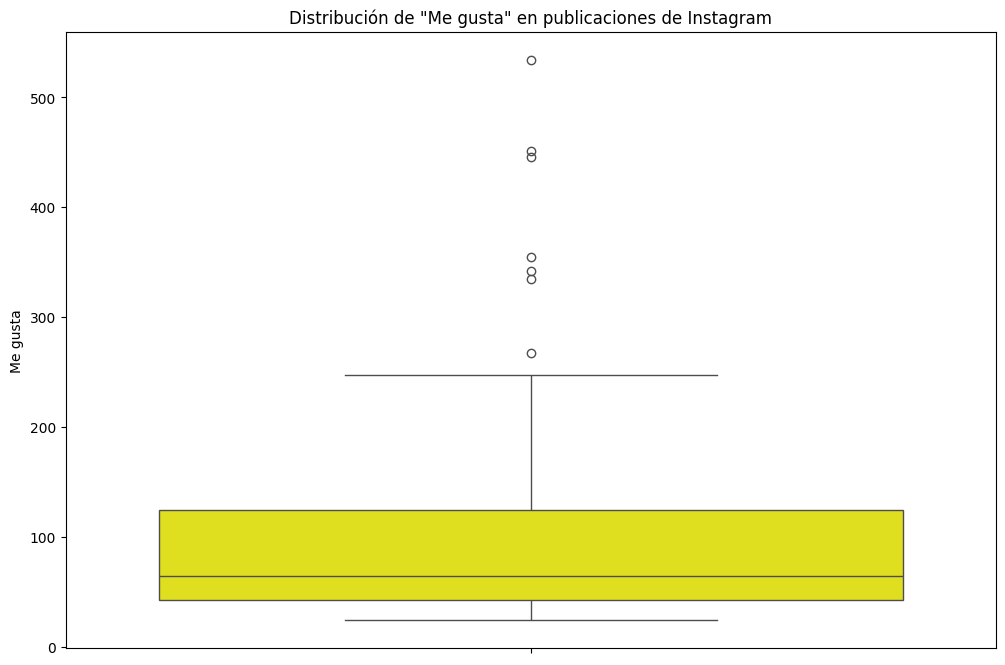

In [ ]:
# Suponiendo que 'data_cuantitativa_proyectos_insta_tipo_publica' es el DataFrame filtrado con los datos relevantes
# Crear el gráfico boxplot con tamaño aumentado y color amarillo
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_municipalidad_instagram['Me gusta'], color='yellow')
plt.title('Distribución de "Me gusta" en publicaciones de Instagram')
plt.show()

In [ ]:
# Encuentra los índices de las tres publicaciones con menor cantidad de 'Me gusta'
indices_menores_MEGUSTAS = data_municipalidad_instagram['Me gusta'].nsmallest(3).index

# Obtén y imprime las descripciones de estas tres publicaciones
descripciones_menores_MEGUSTAS = data_municipalidad_instagram.loc[indices_menores_MEGUSTAS, 'Descripción'].values
print("Descripciones de las tres publicaciones con menor cantidad de (me gustas):")
for descripcion in descripciones_menores_MEGUSTAS:
    print("-" + descripcion)


Descripciones de las tres publicaciones con menor cantidad de (me gustas):
-🌱 ¡Inicia la Siembra! 🌱
Desde la SEDAMA, damos inicio a la siembra responsable de 50 árboles en la Avenida Cali, utilizando el método de goteo para garantizar su crecimiento saludable.
Invitamos a toda nuestra comunidad tulueña a unirse a esta importante labor ambiental, aportando su apoyo y compromiso para cuidar y preservar nuestro entorno. Juntos hacemos de Tuluá un municipio más verde y sostenible #ParaSerFelices 💙🌳💧
-Celebramos Amor y Amistad con nuestra comunidad #ParaSerFelices 💙
-¡Hemos iniciado la reactivación del vivero municipal!🌱💪🏼🪄

Desde la Secretaría de Desarrollo Agropecuario y Medio Ambiente, SEDAMA, estamos impulsando la producción de material ornamental, forestal y de jardinería, con el objetivo de llenar de vida y zonas verdes cada rincón de nuestro municipio. 🌿🌸

Este esfuerzo contribuye a revitalizar nuestros espacios urbanos, creando un entorno más saludable y armonioso para todos. #ParaS

In [ ]:
# Convertir la columna 'Hora de publicación' a tipo datetime, manejar errores con 'coerce'
data_municipalidad_instagram['Hora de publicación'] = pd.to_datetime(data_municipalidad_instagram['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'hora_exacta' con la hora en formato HH:MM
data_municipalidad_instagram['hora_exacta'] = data_municipalidad_instagram['Hora de publicación'].dt.strftime('%H:%M')

# Mantener solo la fecha en la columna 'Hora de publicación'
data_municipalidad_instagram['Hora de publicación'] = data_municipalidad_instagram['Hora de publicación'].dt.strftime('%m/%d/%Y')

# Mostrar el DataFrame resultante
print(data_municipalidad_instagram)

    Identificador de la publicación  Identificador de la cuenta  \
0                 18013771736547872           17841402591799685   
1                 17916330230981043           17841411919702656   
2                 18051735568931528           17841402591799685   
3                 17979764387767583           17841402591799685   
4                 18051901909767231           17841431512646378   
..                              ...                         ...   
81                18035097734158647           17841402591799685   
82                18012007196626913           17841402591799685   
83                17902716720034011           17841402591799685   
84                17985120056577412           17841402591799685   
85                18043396003964655           17841402591799685   

   Nombre de usuario de la cuenta          Nombre de la cuenta  \
0                 alcaldiadetulua            Alcaldía de Tuluá   
1          hospitalrubencruzvelez  Hospital Rubén Cruz Vélez 

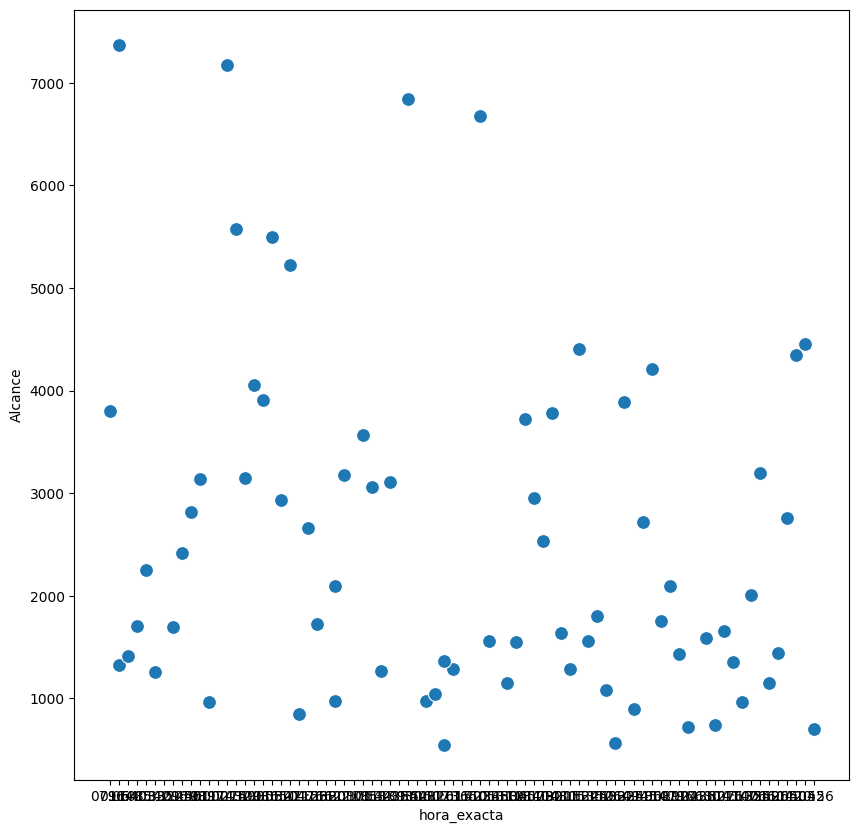

In [ ]:

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_instagram, x='hora_exacta', y='Alcance', s=100)

# Mostrar el gráfico
plt.show()

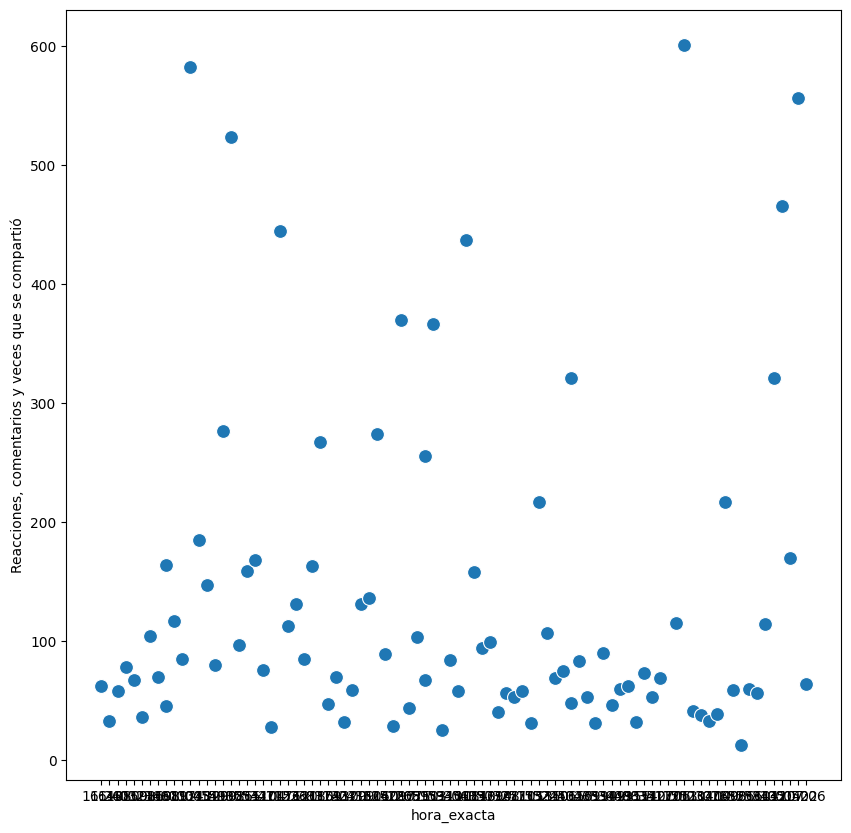

In [ ]:

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_data_vital, x='hora_exacta', y='Reacciones, comentarios y veces que se compartió', s=100)

# Mostrar el gráfico
plt.show()

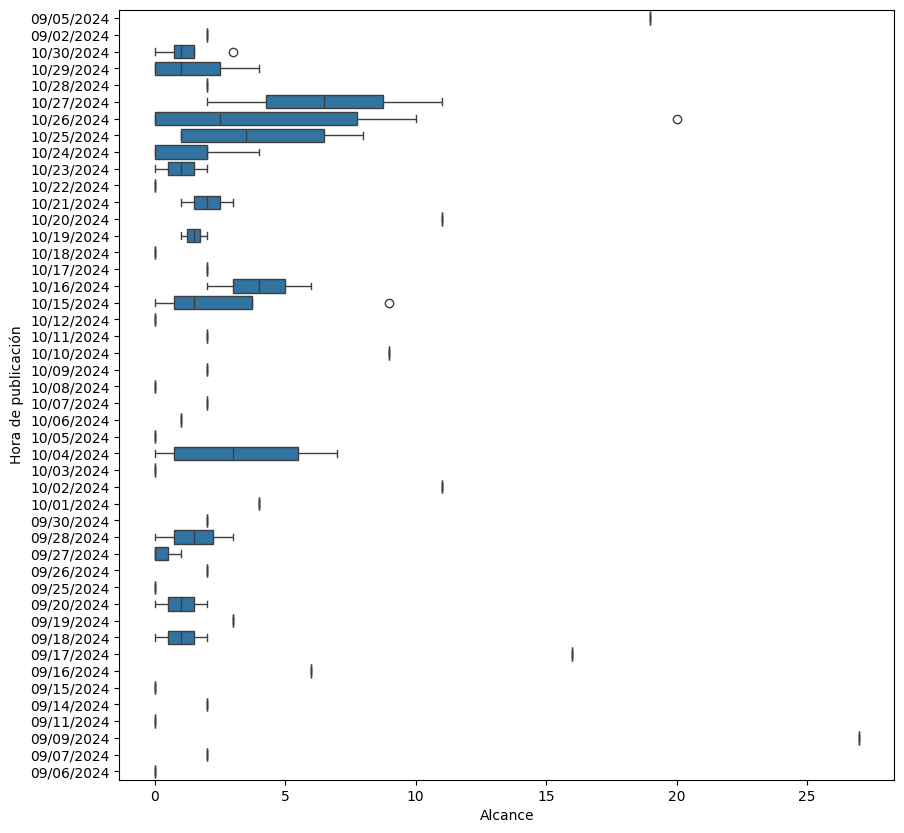

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el boxplot con seaborn
sns.boxplot(x=data_municipalidad_instagram['Comentarios'], y=data_municipalidad_instagram['Hora de publicación'])

# Configurar etiquetas de los ejes
plt.xlabel('Alcance')
plt.ylabel('Hora de publicación')

# Mostrar el gráfico
plt.show()


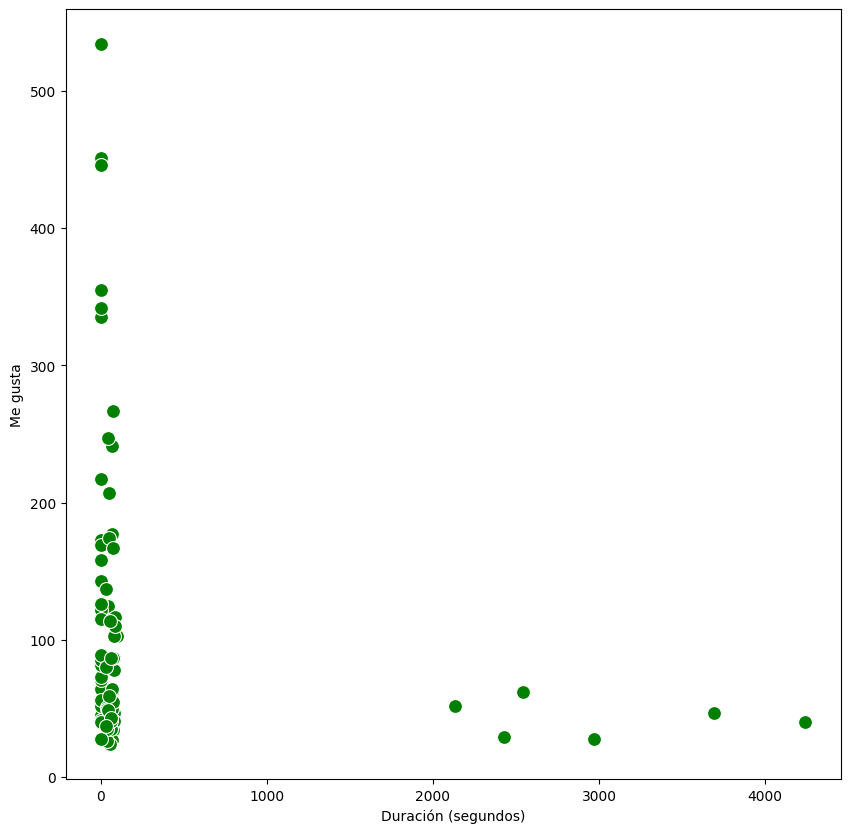

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_instagram, x='Duración (segundos)', y='Me gusta', s=100, color='green')

# Mostrar el gráfico
plt.show()

In [ ]:
data_municipalidad_vital_instagram= data_municipalidad_instagram[['Hora de publicación', 'Alcance', 'Veces que se compartió', 'Reproducciones','Me gusta','Comentarios','Veces que se guardó']]
data_municipalidad_vital_instagram.head()

,Hora de publicación,Alcance,Veces que se compartió,Reproducciones,Me gusta,Comentarios,Veces que se guardó
0,09/05/2024,3802.0,31,NaN,355,19,3
1,09/02/2024,1322.0,2,2149.0,35,2,0
2,10/30/2024,1416.0,3,NaN,33,1,0
3,10/30/2024,1704.0,7,NaN,62,0,3
4,10/30/2024,NaN,2,NaN,69,1,0


In [ ]:
data_municipalidad_data_vital.head()

,Descripción,Identificador de la publicación,Reacciones,Tipo de publicación,Hora de publicación,Impresiones,Alcance,"Reacciones, comentarios y veces que se compartió",Comentarios,Veces que se compartió,Total de clics,Duración (segundos),hora_exacta,Interacciones_totales
0,¡Nuevo servicio de Fisioterapia!🌟 ...,942933341207332,54,Reels,09/02/2024,1745.0,1454.0,62.0,1,7,0.0,57,16:26,62
1,¡Mejoramos la conectividad en nuestra zona rur...,987852620048737,26,Reels,10/30/2024,547.0,538.0,33.0,1,6,0.0,68,16:40,33
2,🚨 ¡Caen integrantes de “La Inmaculada”! 📣\n\nL...,987789106721755,41,Reels,10/30/2024,937.0,918.0,58.0,5,12,0.0,67,14:03,58
3,En vivo con Secretario de Hacienda,1491161731599174,65,En vivo,10/30/2024,NaN,546.0,78.0,9,4,NaN,1781,13:02,78
4,#ParaSerFelices,1205766237352219,60,En vivo,10/30/2024,NaN,728.0,67.0,4,3,NaN,3183,08:21,67


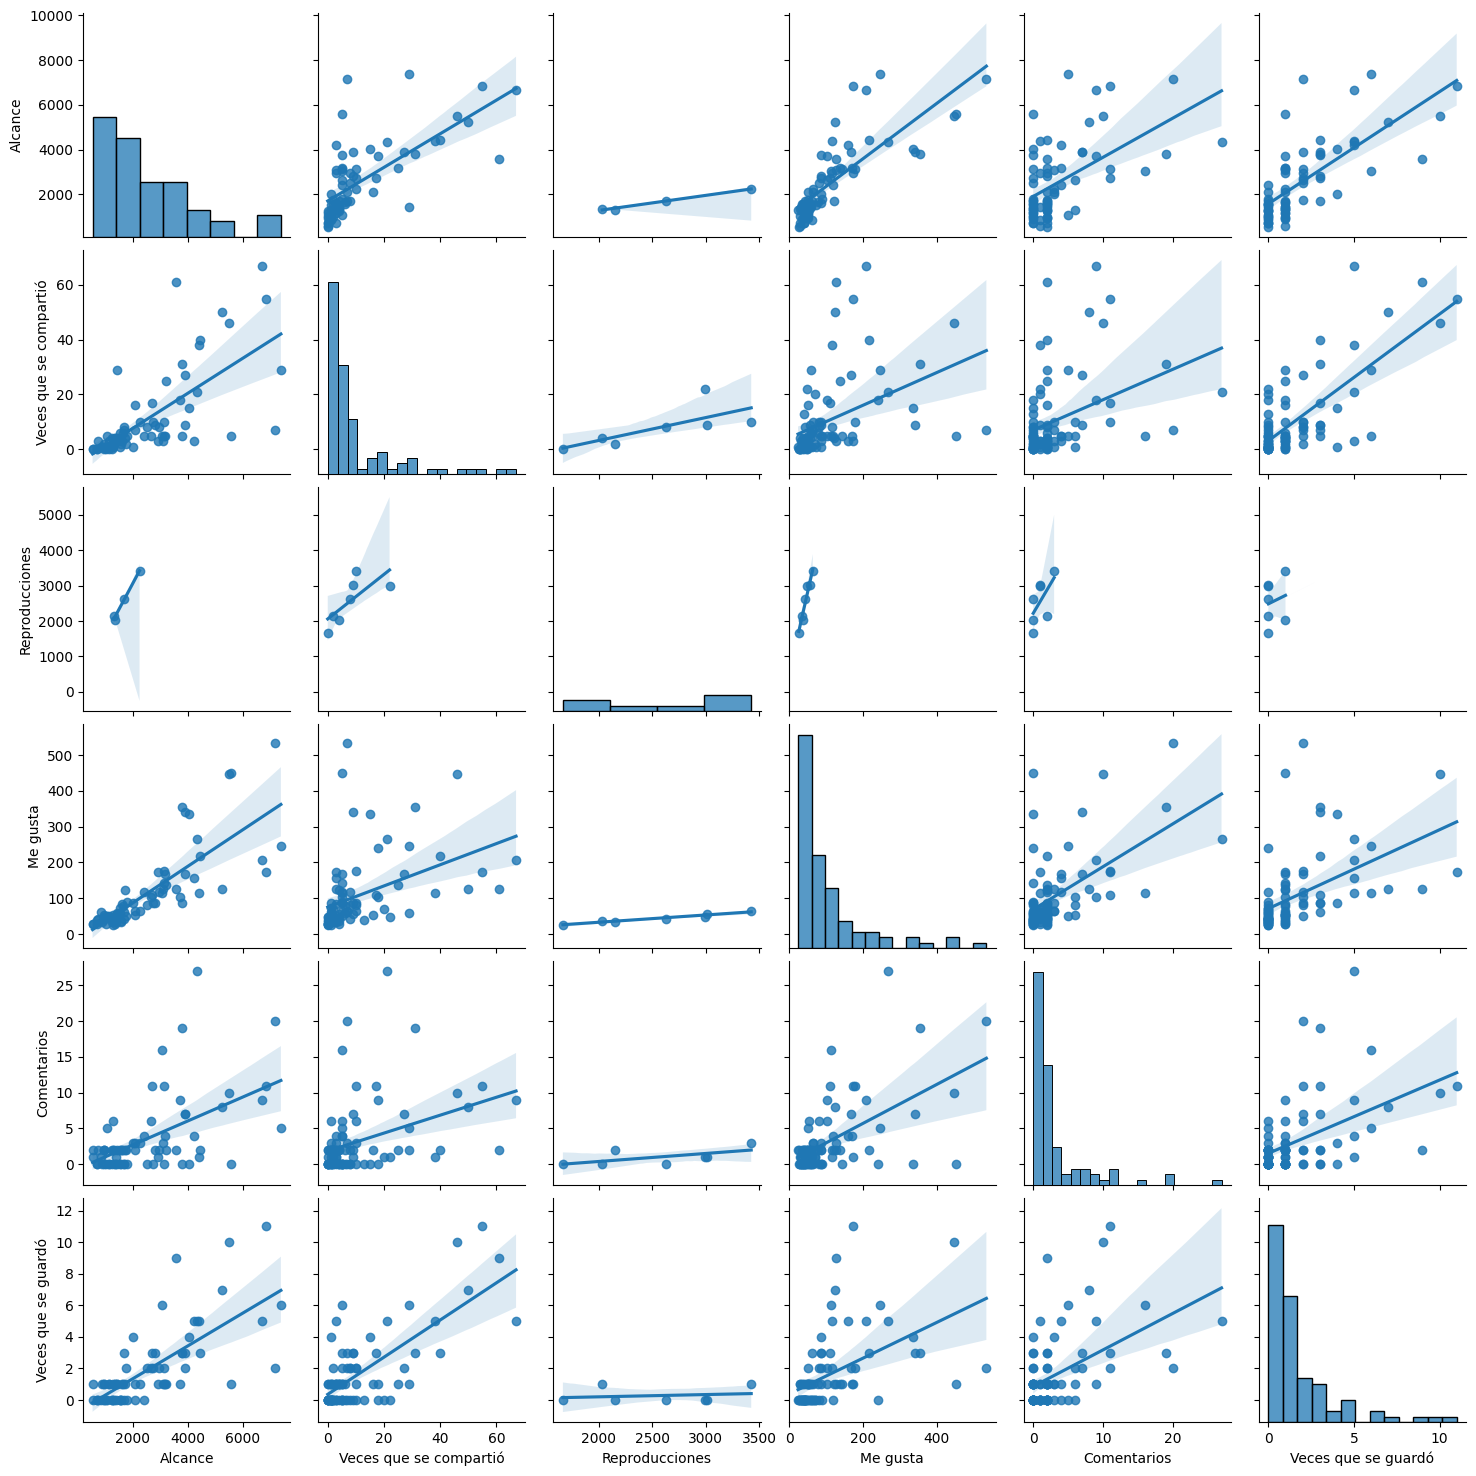

In [ ]:
sns.pairplot(data_municipalidad_vital_instagram, kind='reg')

<ipython-input-73-28d8a83f7266>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_municipalidad_vital_instagram['Hora de publicación'] = pd.to_datetime(data_municipalidad_vital_instagram['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')


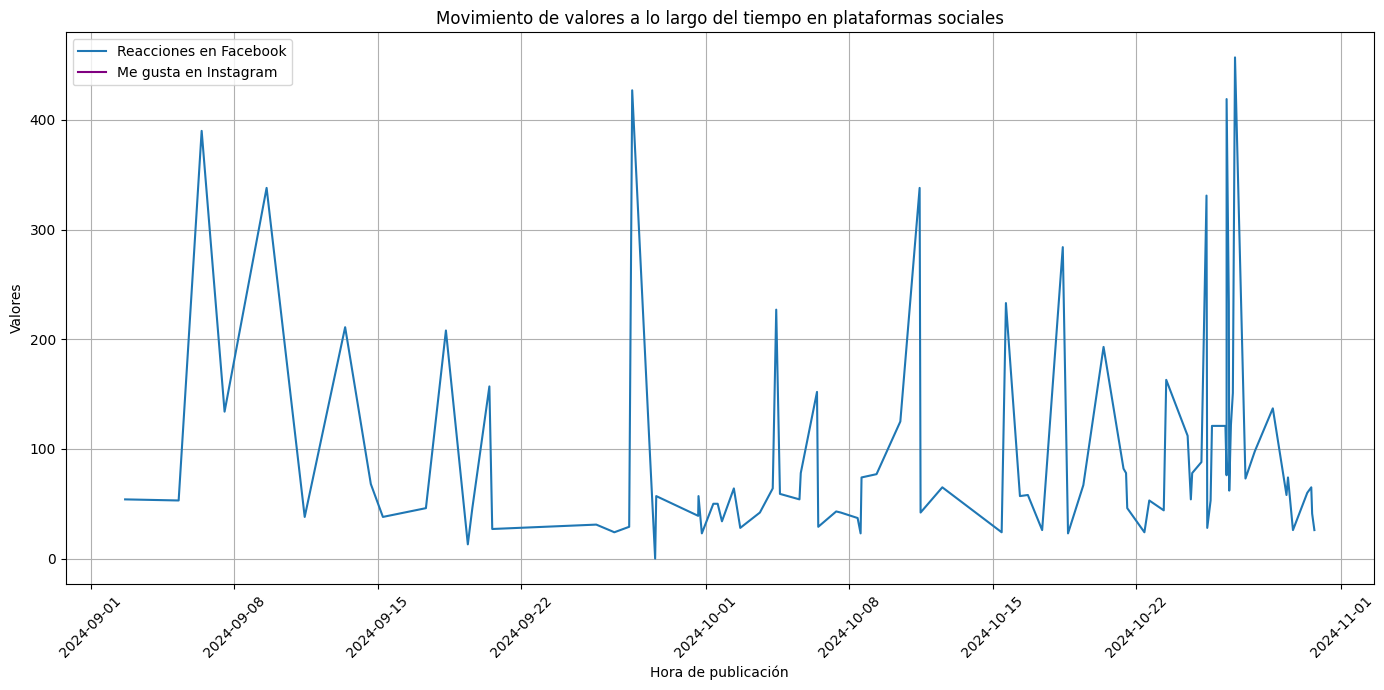

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarnos de que no haya espacios en los nombres de las columnas de ambos datasets
data_municipalidad_facebook.columns = data_municipalidad_facebook.columns.str.strip()
data_municipalidad_vital_instagram.columns = data_municipalidad_vital_instagram.columns.str.strip()

# Convertir 'Hora de publicación' a formato datetime y ordenar por fecha en ambos datasets
data_municipalidad_facebook['Hora de publicación'] = pd.to_datetime(data_municipalidad_facebook['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')
data_municipalidad_vital_instagram['Hora de publicación'] = pd.to_datetime(data_municipalidad_vital_instagram['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')

# Ordenar por 'Hora de publicación'
data_municipalidad_facebook = data_municipalidad_facebook.sort_values(by='Hora de publicación')
data_municipalidad_vital_instagram = data_municipalidad_vital_instagram.sort_values(by='Hora de publicación')

# Interpolar valores nulos para las columnas necesarias en ambos datasets
data_municipalidad_facebook['Reacciones'] = data_municipalidad_facebook['Reacciones'].interpolate()
data_municipalidad_vital_instagram['Me gusta'] = data_municipalidad_vital_instagram['Me gusta'].interpolate()

# Graficar los datos
plt.figure(figsize=(14, 7))

plt.plot(data_municipalidad_facebook['Hora de publicación'], data_municipalidad_facebook['Reacciones'], label='Reacciones en Facebook')
plt.plot(data_municipalidad_vital_instagram['Hora de publicación'], data_municipalidad_vital_instagram['Me gusta'], label='Me gusta en Instagram', color='purple')  # Color morado para Instagram

plt.xlabel('Hora de publicación')
plt.ylabel('Valores')
plt.title('Movimiento de valores a lo largo del tiempo en plataformas sociales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
data_primeros_15_agosto = pd.read_csv('Data_bussines_suite_meta/Jul-31-2024_Sep-01-2024_3712938279022902.csv')
data_primeros_15_septiembre = pd.read_csv('Data_bussines_suite_meta/Sep-01-2024_Sep-15-2024_1557380705154786.csv')

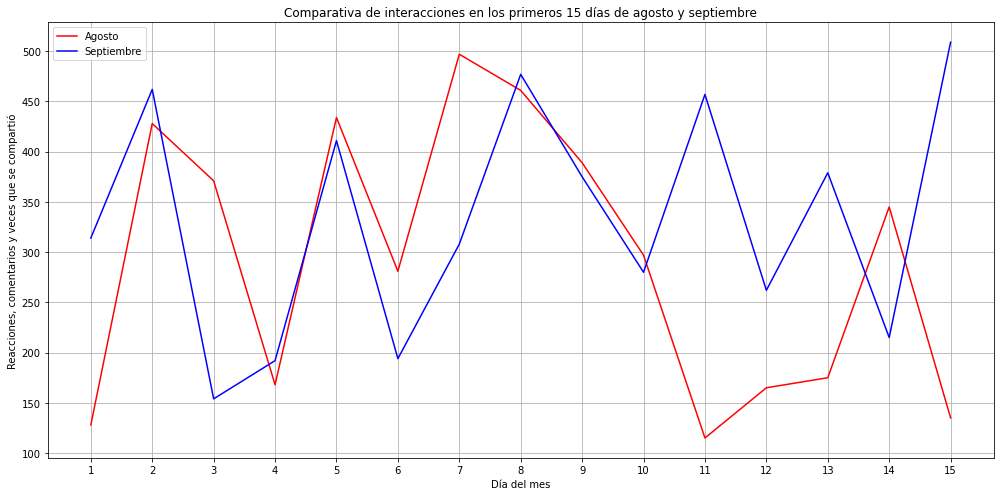

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear datasets dummy
dias = range(1, 16)
data_primeros_15_agosto = pd.DataFrame({
    'Día': dias,
    'Reacciones, comentarios y veces que se compartió': np.random.randint(100, 500, size=15)
})

data_primeros_15_septiembre = pd.DataFrame({
    'Día': dias,
    'Reacciones, comentarios y veces que se compartió': np.random.randint(150, 550, size=15)
})

# Graficar los datos
plt.figure(figsize=(14, 7))

# Graficar los valores de agosto en rojo
plt.plot(data_primeros_15_agosto['Día'],
         data_primeros_15_agosto['Reacciones, comentarios y veces que se compartió'],
         label='Agosto', color='red')

# Graficar los valores de septiembre en azul
plt.plot(data_primeros_15_septiembre['Día'],
         data_primeros_15_septiembre['Reacciones, comentarios y veces que se compartió'],
         label='Septiembre', color='blue')

# Añadir etiquetas y título
plt.xlabel('Día del mes')
plt.ylabel('Reacciones, comentarios y veces que se compartió')
plt.title('Comparativa de interacciones en los primeros 15 días de agosto y septiembre')
plt.legend()
plt.grid(True)
plt.xticks(dias)  # Mostrar los días del 1 al 15 en el eje X
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [ ]:
data_primeros_15_agosto = pd.read_csv('Data_bussines_suite_meta/Jul-31-2024_Sep-01-2024_3841465006139517.csv')
data_primeros_15_septiembre = pd.read_csv('Data_bussines_suite_meta/Sep-01-2024_Sep-15-2024_1470341180336572.csv')

In [ ]:
data_primeros_15_agosto.head()

,Identificador de la publicación,Identificador de la cuenta,Nombre de usuario de la cuenta,Nombre de la cuenta,Descripción,Duración (segundos),Hora de publicación,Enlace permanente,Tipo de publicación,Comentario sobre los datos,Fecha,Impresiones,Alcance,Veces que se compartió,Seguimientos,Reproducciones,Me gusta,Comentarios,Veces que se guardó,Día
0,17892843947985175,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,¡Corre seguro este domingo!✅👟🏃🏼🏃🏼‍♀️ \n\nDesde...,65,2024-08-02 16:08:00,https://www.instagram.com/reel/C-L5NsyuR5Y/,Reel de Instagram,NaN,Total,4642.0,3589.0,10,NaN,8010.0,140,8,2,2
1,18323656753150951,17841411919702656,hospitalrubencruzvelez,Hospital Rubén Cruz Vélez,📣 Se informa a la ciudadanía que la estrategia...,42,2024-08-02 06:08:00,https://www.instagram.com/reel/C-K1GR7uLa9/,Reel de Instagram,NaN,Total,NaN,NaN,17,NaN,4807.0,86,9,0,2
2,18043769962823826,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,¡Caen integrantes de la Inmaculada encargados ...,31,2024-08-30 14:08:00,https://www.instagram.com/reel/C_TxMIavnB9/,Reel de Instagram,NaN,Total,3417.0,3221.0,2,NaN,6086.0,112,4,4,30
3,18067617517597046,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,¡Encuentros con el Alcalde!🙌🏽✅\n\nBienvenidos ...,4076,2024-08-30 11:08:00,https://www.instagram.com/reel/C_TcpRbO504/,Reel de Instagram,NaN,Total,551.0,517.0,0,NaN,825.0,27,2,1,30
4,18128188972371585,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,🎉 ¡PAPAYAZO TRIBUTARIO 2024! 💰 ✅\n\nAprovecha ...,0,2024-08-30 09:08:00,https://www.instagram.com/p/C_TRJn2uZ0m/,Secuencia de Instagram,NaN,Total,2043.0,1520.0,11,1.0,NaN,26,2,3,30


In [ ]:
data_primeros_15_septiembre.head()

,Identificador de la publicación,Identificador de la cuenta,Nombre de usuario de la cuenta,Nombre de la cuenta,Descripción,Duración (segundos),Hora de publicación,Enlace permanente,Tipo de publicación,Comentario sobre los datos,Fecha,Veces que se compartió,Reproducciones,Me gusta,Comentarios,Veces que se guardó,Impresiones,Alcance,Seguimientos
0,18013771736547872,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,¡Grandes noticias para la educación en Tuluá! ...,0,09/05/2024 07:09,https://www.instagram.com/p/C_icd62ujji/,Secuencia de Instagram,NaN,Total,31,NaN,355,18,3,4892.0,3732.0,1.0
1,17916330230981043,17841411919702656,hospitalrubencruzvelez,Hospital Rubén Cruz Vélez,¡Nuevo servicio de Fisioterapia! 🌟🤸🏼‍♂️\n\nNos...,56,09/02/2024 09:09,https://www.instagram.com/reel/C_bAuOyuUqD/,Reel de Instagram,NaN,Total,2,1997.0,34,2,0,NaN,NaN,NaN
2,18311623072095718,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,Revive el live “Encuentros con el Alcalde”💪🏼\n...,3694,09/15/2024 06:09,https://www.instagram.com/reel/C_8HyUaOEhc/,Reel de Instagram,NaN,Total,0,1447.0,38,0,0,891.0,872.0,NaN
3,18051406663846689,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,¡Limpieza y recuperación de los espacios!✅🧹\n\...,48,09/15/2024 06:09,https://www.instagram.com/reel/C_8GRpJO_xy/,Reel de Instagram,NaN,Total,0,65.0,1,0,0,44.0,38.0,NaN
4,18035097734158647,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,¡Concluimos la Ruta de la Felicidad en la Comu...,51,09/14/2024 16:09,https://www.instagram.com/reel/C_6jjgtOJ2x/,Reel de Instagram,NaN,Total,29,2365.0,51,2,1,1483.0,1242.0,NaN


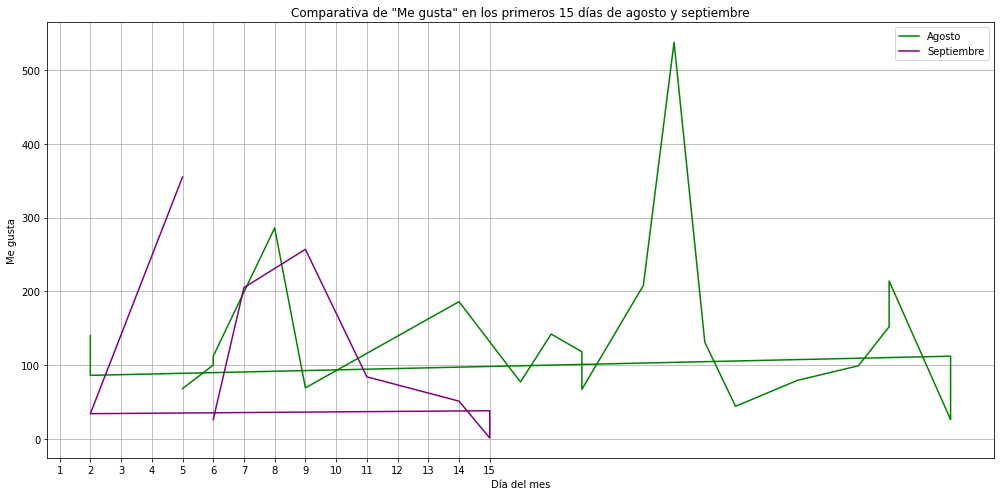

In [ ]:
# Revisar y llenar valores nulos en 'Me gusta'
data_primeros_15_agosto['Me gusta'] = data_primeros_15_agosto['Me gusta'].interpolate()
data_primeros_15_septiembre['Me gusta'] = data_primeros_15_septiembre['Me gusta'].interpolate()

# Graficar los datos
plt.figure(figsize=(14, 7))

# Graficar los valores de 'Me gusta' de agosto en verde
plt.plot(data_primeros_15_agosto['Día'],
         data_primeros_15_agosto['Me gusta'],
         label='Agosto', color='green')

# Graficar los valores de 'Me gusta' de septiembre en morado
plt.plot(data_primeros_15_septiembre['Día'],
         data_primeros_15_septiembre['Me gusta'],
         label='Septiembre', color='purple')

# Añadir etiquetas y título
plt.xlabel('Día del mes')
plt.ylabel('Me gusta')
plt.title('Comparativa de "Me gusta" en los primeros 15 días de agosto y septiembre')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))  # Mostrar los días del 1 al 15 en el eje X
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [ ]:
# Mostrar las primeras filas de ambos datasets para inspeccionar los datos
print("Datos de los primeros 15 días de agosto:")
print(data_primeros_15_agosto.head(15))

print("\nDatos de los primeros 15 días de septiembre:")
print(data_primeros_15_septiembre.head(15))


Datos de los primeros 15 días de agosto:
    Identificador de la publicación  Identificador de la cuenta  \
0                 17892843947985175           17841402591799685   
1                 18323656753150951           17841411919702656   
2                 18043769962823826           17841402591799685   
3                 18067617517597046           17841402591799685   
4                 18128188972371585           17841402591799685   
5                 18017398763582738           17841402591799685   
6                 18040698574852084           17841402591799685   
7                 18154322095317320           17841402591799685   
8                 18432868675070705           17841400356362656   
9                 18038379134043830           17841402591799685   
10                18067917469605634           17841402591799685   
11                18034301249484347           17841402591799685   
12                18034043570176793           17841402591799685   
13                180

In [ ]:
# Estadísticas descriptivas para la columna 'Me gusta' de ambos datasets
print("\nEstadísticas descriptivas de 'Me gusta' para agosto:")
print(data_primeros_15_agosto['Me gusta'].describe())

print("\nEstadísticas descriptivas de 'Me gusta' para septiembre:")
print(data_primeros_15_septiembre['Me gusta'].describe())



Estadísticas descriptivas de 'Me gusta' para agosto:
count     23.000000
mean     133.956522
std      108.250332
min       26.000000
25%       73.000000
50%      112.000000
75%      147.000000
max      538.000000
Name: Me gusta, dtype: float64

Estadísticas descriptivas de 'Me gusta' para septiembre:
count      9.000000
mean     116.777778
std      124.649286
min        1.000000
25%       34.000000
50%       51.000000
75%      205.000000
max      355.000000
Name: Me gusta, dtype: float64


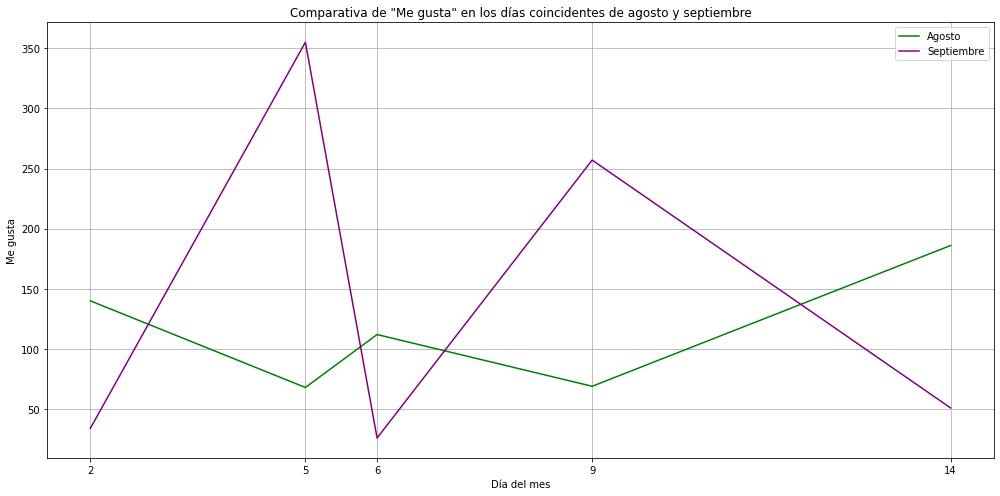

In [ ]:
# Asegurarnos de que la columna 'Hora de publicación' está en formato datetime
data_primeros_15_agosto['Hora de publicación'] = pd.to_datetime(data_primeros_15_agosto['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')
data_primeros_15_septiembre['Hora de publicación'] = pd.to_datetime(data_primeros_15_septiembre['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'Día' extrayendo el día del mes
data_primeros_15_agosto['Día'] = data_primeros_15_agosto['Hora de publicación'].dt.day
data_primeros_15_septiembre['Día'] = data_primeros_15_septiembre['Hora de publicación'].dt.day

# Eliminar filas duplicadas basadas en la columna 'Día'
data_primeros_15_agosto = data_primeros_15_agosto.drop_duplicates(subset='Día')
data_primeros_15_septiembre = data_primeros_15_septiembre.drop_duplicates(subset='Día')

# Crear un rango de días del 1 al 15
dias_completos = range(1, 16)

# Reindexar ambos datasets para tener los días del 1 al 15, y rellenar con NaN donde falten datos
data_primeros_15_agosto = data_primeros_15_agosto.set_index('Día').reindex(dias_completos).reset_index()
data_primeros_15_septiembre = data_primeros_15_septiembre.set_index('Día').reindex(dias_completos).reset_index()

# Eliminar filas donde ambos datasets no tienen datos (es decir, ambos tienen NaN en el mismo día)
combined_data = pd.merge(data_primeros_15_agosto[['Día', 'Me gusta']],
                         data_primeros_15_septiembre[['Día', 'Me gusta']],
                         on='Día', suffixes=('_agosto', '_septiembre'))

# Eliminar filas con NaN en ambos meses
combined_data.dropna(subset=['Me gusta_agosto', 'Me gusta_septiembre'], inplace=True)

# Graficar los datos
plt.figure(figsize=(14, 7))

# Graficar los valores de 'Me gusta' de agosto en verde
plt.plot(combined_data['Día'],
         combined_data['Me gusta_agosto'],
         label='Agosto', color='green')

# Graficar los valores de 'Me gusta' de septiembre en morado
plt.plot(combined_data['Día'],
         combined_data['Me gusta_septiembre'],
         label='Septiembre', color='purple')

# Añadir etiquetas y título
plt.xlabel('Día del mes')
plt.ylabel('Me gusta')
plt.title('Comparativa de "Me gusta" en los días coincidentes de agosto y septiembre')
plt.legend()
plt.grid(True)
plt.xticks(combined_data['Día'])  # Mostrar solo los días con datos en ambos meses
plt.tight_layout()

# Mostrar gráfico
plt.show()
